# **efood Assesment Test - Business Intelligence Analyst**

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import polars as pl
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


import plotly.graph_objects as go
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


import folium
from folium.plugins import MarkerCluster

import networkx as nx

**Read the data**

In [2]:
# Read the Excel file into a DataFrame
df = pd.read_csv('efood assessment 2023 - orders.csv')
df.head()

,order_id,user_id,user_class_name,order_timestamp,city,vertical,cuisine,device,paid_cash,order_contains_offer,coupon_discount_amount,amount,delivery_cost
0,11624190919400,555845617152,Loyal,2023-09-25 10:57:40 UTC,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0
1,11609038288316,555845617152,Loyal,2023-09-23 11:52:50 UTC,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0
2,11398469424776,555845617152,Infrequent,2023-08-25 11:19:38 UTC,Άρτα,Restaurant,Breakfast,iOS,False,False,2.0,4.0,0.0
3,11566026638236,555845617152,Loyal,2023-09-17 14:09:07 UTC,Άρτα,Restaurant,Italian,iOS,False,False,0.0,19.5,0.0
4,11572921541732,555845617152,Loyal,2023-09-18 12:13:43 UTC,Άρτα,Restaurant,Breakfast,iOS,False,False,0.0,2.0,0.0


# **Data Manipulation**

In [3]:
df.isnull().sum()

order_id                  0
user_id                   0
user_class_name           0
order_timestamp           0
city                      0
vertical                  0
cuisine                   0
device                    0
paid_cash                 0
order_contains_offer      0
coupon_discount_amount    0
amount                    0
delivery_cost             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656209 entries, 0 to 656208
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                656209 non-null  int64  
 1   user_id                 656209 non-null  int64  
 2   user_class_name         656209 non-null  object 
 3   order_timestamp         656209 non-null  object 
 4   city                    656209 non-null  object 
 5   vertical                656209 non-null  object 
 6   cuisine                 656209 non-null  object 
 7   device                  656209 non-null  object 
 8   paid_cash               656209 non-null  bool   
 9   order_contains_offer    656209 non-null  bool   
 10  coupon_discount_amount  656209 non-null  float64
 11  amount                  656209 non-null  float64
 12  delivery_cost           656209 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 56.3+ MB


In [5]:
# Identify and Count Duplicate Rows Based on All Columns
duplicate_rows = df[df.duplicated()]

# Display the Duplicate Rows and their Count
print(f"The number of duplicate rows in the dataset is: {len(duplicate_rows)}")

The number of duplicate rows in the dataset is: 0


In [6]:
# Display Descriptive Statistics of Numeric Columns
description = df.describe()
print(f"\nDescriptive Statistics:\n")
description


Descriptive Statistics:



,order_id,user_id,coupon_discount_amount,amount,delivery_cost
count,6.562090e+05,6.562090e+05,656209.000000,656209.000000,656209.000000
mean,1.145368e+13,3.883051e+11,0.079634,9.783079,0.125978
std,1.200831e+11,2.607527e+11,0.561622,7.413664,0.325226
min,1.124739e+13,9.276618e+07,0.000000,0.000000,0.000000
25%,1.134842e+13,1.608998e+11,0.000000,5.000000,0.000000
50%,1.145245e+13,3.124484e+11,0.000000,7.890000,0.000000
75%,1.155727e+13,6.281902e+11,0.000000,12.500000,0.000000
max,1.166646e+13,8.712559e+11,22.420000,493.500000,5.000000


In [7]:
# Display Information About the DataFrame
info_text = f"\nDataFrame Information:\n {df.info()}"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656209 entries, 0 to 656208
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                656209 non-null  int64  
 1   user_id                 656209 non-null  int64  
 2   user_class_name         656209 non-null  object 
 3   order_timestamp         656209 non-null  object 
 4   city                    656209 non-null  object 
 5   vertical                656209 non-null  object 
 6   cuisine                 656209 non-null  object 
 7   device                  656209 non-null  object 
 8   paid_cash               656209 non-null  bool   
 9   order_contains_offer    656209 non-null  bool   
 10  coupon_discount_amount  656209 non-null  float64
 11  amount                  656209 non-null  float64
 12  delivery_cost           656209 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 56.3+ MB


In [8]:
# Convert the Boolean of the column paid_cash and order_contains_offer into binary
# Create a new column 'payment_method' based on 'paid_cash' values
df['payment_method'] = df['paid_cash'].replace({False: '0', True: '1'})

# Drop the original 'paid_cash' column
df = df.drop('paid_cash', axis=1)

# Change the column 'order_contains_offer' to binary values for future reference
df['order_contains_offer'] = df['order_contains_offer'].replace({False: 0, True: 1})
df.head()

,order_id,user_id,user_class_name,order_timestamp,city,vertical,cuisine,device,order_contains_offer,coupon_discount_amount,amount,delivery_cost,payment_method
0,11624190919400,555845617152,Loyal,2023-09-25 10:57:40 UTC,Άρτα,Restaurant,Breakfast,iOS,0,0.0,2.0,0.0,0
1,11609038288316,555845617152,Loyal,2023-09-23 11:52:50 UTC,Άρτα,Restaurant,Breakfast,iOS,0,0.0,2.0,0.0,0
2,11398469424776,555845617152,Infrequent,2023-08-25 11:19:38 UTC,Άρτα,Restaurant,Breakfast,iOS,0,2.0,4.0,0.0,0
3,11566026638236,555845617152,Loyal,2023-09-17 14:09:07 UTC,Άρτα,Restaurant,Italian,iOS,0,0.0,19.5,0.0,0
4,11572921541732,555845617152,Loyal,2023-09-18 12:13:43 UTC,Άρτα,Restaurant,Breakfast,iOS,0,0.0,2.0,0.0,0


**Time Manipulation**

In [9]:
# Convert the order_timestamp to datetime
df['order_timestamp'] = pd.to_datetime(df['order_timestamp'])

# Extracting year, month, and hour
df['year'] = df['order_timestamp'].dt.year
df['month'] = df['order_timestamp'].dt.month
df['day_of_week'] = df['order_timestamp'].dt.day_name()
df['hour'] = df['order_timestamp'].dt.hour

# Categorizing hours into "morning" "lunchtime" and "evening"
bins = [0, 11, 16, 23]
labels = ['morning', 'lunch_time', 'evening']
df['time_of_day'] = pd.cut(df['hour'], bins=bins, labels=labels, include_lowest=True)

# Display the modified DataFrame
df[['order_timestamp', 'year', 'month', 'day_of_week','hour', 'time_of_day']].head()

,order_timestamp,year,month,day_of_week,hour,time_of_day
0,2023-09-25 10:57:40+00:00,2023,9,Monday,10,morning
1,2023-09-23 11:52:50+00:00,2023,9,Saturday,11,morning
2,2023-08-25 11:19:38+00:00,2023,8,Friday,11,morning
3,2023-09-17 14:09:07+00:00,2023,9,Sunday,14,lunch_time
4,2023-09-18 12:13:43+00:00,2023,9,Monday,12,lunch_time


In [10]:
# Drop the column 'order_timestamp'
df = df.drop(columns=['order_timestamp'])

In [11]:
# Map month numbers to names in the DataFrame
month_names = {8: 'August', 9: 'September'}
df['month_name'] = df['month'].map(month_names)

In [12]:
# The final dataframe i will use from now on for my analysis
df.head()

,order_id,user_id,user_class_name,city,vertical,cuisine,device,order_contains_offer,coupon_discount_amount,amount,delivery_cost,payment_method,year,month,day_of_week,hour,time_of_day,month_name
0,11624190919400,555845617152,Loyal,Άρτα,Restaurant,Breakfast,iOS,0,0.0,2.0,0.0,0,2023,9,Monday,10,morning,September
1,11609038288316,555845617152,Loyal,Άρτα,Restaurant,Breakfast,iOS,0,0.0,2.0,0.0,0,2023,9,Saturday,11,morning,September
2,11398469424776,555845617152,Infrequent,Άρτα,Restaurant,Breakfast,iOS,0,2.0,4.0,0.0,0,2023,8,Friday,11,morning,August
3,11566026638236,555845617152,Loyal,Άρτα,Restaurant,Italian,iOS,0,0.0,19.5,0.0,0,2023,9,Sunday,14,lunch_time,September
4,11572921541732,555845617152,Loyal,Άρτα,Restaurant,Breakfast,iOS,0,0.0,2.0,0.0,0,2023,9,Monday,12,lunch_time,September


# **Data Analysis**

In [13]:
# Calculate the overall percentage of orders with coupon
overall_coupon_percentage = (df[df['coupon_discount_amount'] > 0].shape[0] / df.shape[0]) * 100

# Round the overall coupon percentage to two decimal places
overall_coupon_percentage_rounded = round(overall_coupon_percentage, 2)

print(f"Overall Coupon Percentage: {overall_coupon_percentage_rounded:.2f}%")

# Calculate the percentage of orders with coupon for each period of time
coupon_percentage_by_period_time = df.groupby('time_of_day')['coupon_discount_amount'].apply(lambda x: (x > 0).sum() / len(x) * 100).reset_index()

# Add an extra column with rounded coupon percentage
coupon_percentage_by_period_time['coupon_percentage (%)'] = coupon_percentage_by_period_time['coupon_discount_amount'].round(2)

# Display the result
print("\nCoupon Percentage by Time of Day:")
coupon_percentage_by_period_time

Overall Coupon Percentage: 2.56%

Coupon Percentage by Time of Day:


,time_of_day,coupon_discount_amount,coupon_percentage (%)
0,morning,2.921298,2.92
1,lunch_time,2.448902,2.45
2,evening,2.421648,2.42


# **Total Revenues of efood by City**

In [14]:
# Group by 'city' and calculate the total revenue, then sort by amount in descending order
total_revenue_by_city = df.groupby('city')['amount'].sum().sort_values(ascending=False).reset_index()

# Display the result
total_revenue_by_city

,city,amount
0,Ρόδος,1884377.54
1,Ιωάννινα,1304928.13
2,Ξάνθη,864371.39
3,Αγρίνιο,595521.88
4,Αλεξανδρούπολη,557691.41
5,Δράμα,456115.01
6,Ζάκυνθος,195961.19
7,Ραφήνα,169887.64
8,Αίγιο,157625.56
9,Άρτα,109172.29


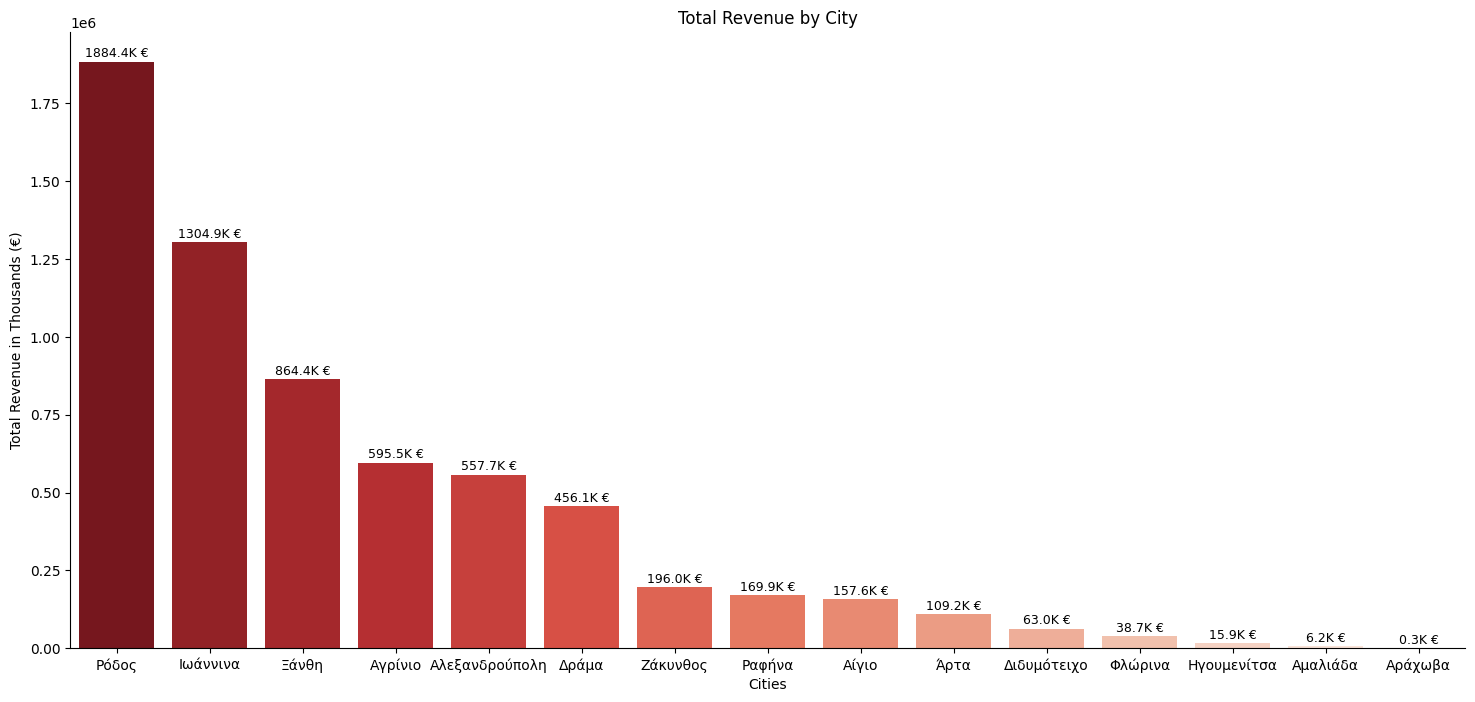

In [15]:
# Convert 'amount' column to numeric to ensure correct calculations
total_revenue_by_city['amount'] = pd.to_numeric(total_revenue_by_city['amount'], errors='coerce')

# Calculate the total revenue in euros
total_revenue_in_euros = total_revenue_by_city['amount'].sum() / 1000

# Set the figure size
plt.figure(figsize=(18, 8))  # Increase the height of the figure

# Plot the bar chart without edge color
ax = sns.barplot(x='city', y='amount', data=total_revenue_by_city, palette='Reds_r', edgecolor=None)

# Add the total amount at the top of each column
for index, value in enumerate(total_revenue_by_city['amount']):
    ax.text(index, value + 5000, f'{value/1000:.1f}K €', ha='center', va='bottom', fontsize=9, color='black')

# Customize the plot
plt.title('Total Revenue by City')
plt.xlabel('Cities')
plt.ylabel('Total Revenue in Thousands (€)')

# Remove top and right spines
sns.despine()

# Show the plot
plt.show()

# **Total Revenue of efood by Month**

In [16]:
# Group by 'month' and calculate the total revenue
total_revenue_by_month = df.groupby('month_name')['amount'].sum().reset_index()

# Display the result
total_revenue_by_month

,month_name,amount
0,August,3168071.55
1,September,3251672.88


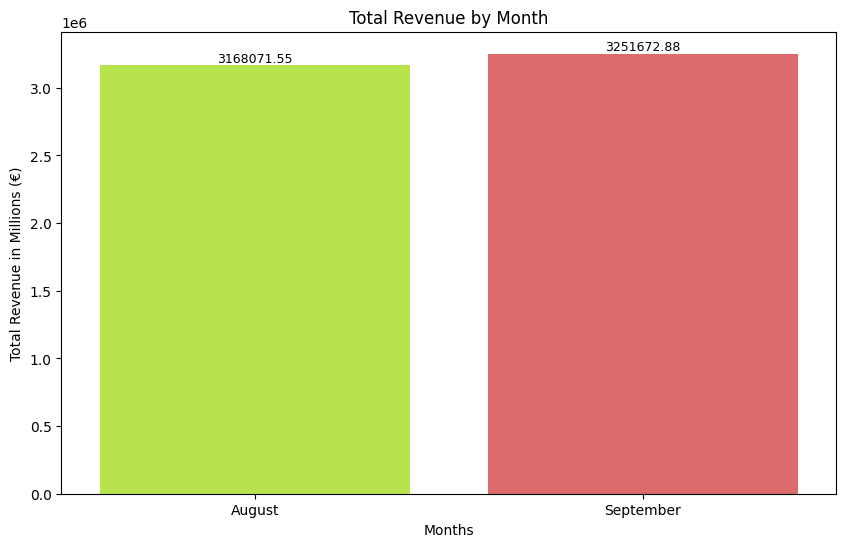

In [17]:
# Create a bar plot using Seaborn with smaller bins
plt.figure(figsize=(10, 6))
colors = ['#b2fe00', '#ed2e2e']

# Using different colors for each bar
sns.barplot(x='month_name', y='amount', data=total_revenue_by_month, palette=colors, errorbar=None, capsize=0.2, errwidth=1.5, dodge=True, alpha=0.8, edgecolor=None)

# Add annotations at the top of each bar
for index, value in enumerate(total_revenue_by_month['amount']):
    plt.text(index, value + 0.1, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

# Customize the plot
plt.title('Total Revenue by Month')
plt.xlabel('Months')
plt.ylabel('Total Revenue in Millions (€)')

# Show the plot
plt.show()

# **Total Revenue by vertical store by month**

In [22]:
# Calculate total revenue by 'vertical' and 'month'
revenue_by_vertical_and_month = df.groupby(['vertical', 'month_name'])['amount'].sum().reset_index()
revenue_by_vertical_and_month

,vertical,month_name,amount
0,Local Stores,August,5857.87
1,Local Stores,September,8652.29
2,Restaurant,August,3162213.68
3,Restaurant,September,3243020.59


In [23]:
# Calculate total revenue by 'vertical'
total_revenue_by_vertical = df.groupby('vertical')['amount'].sum().reset_index()
total_revenue_by_vertical

,vertical,amount
0,Local Stores,14510.16
1,Restaurant,6405234.27


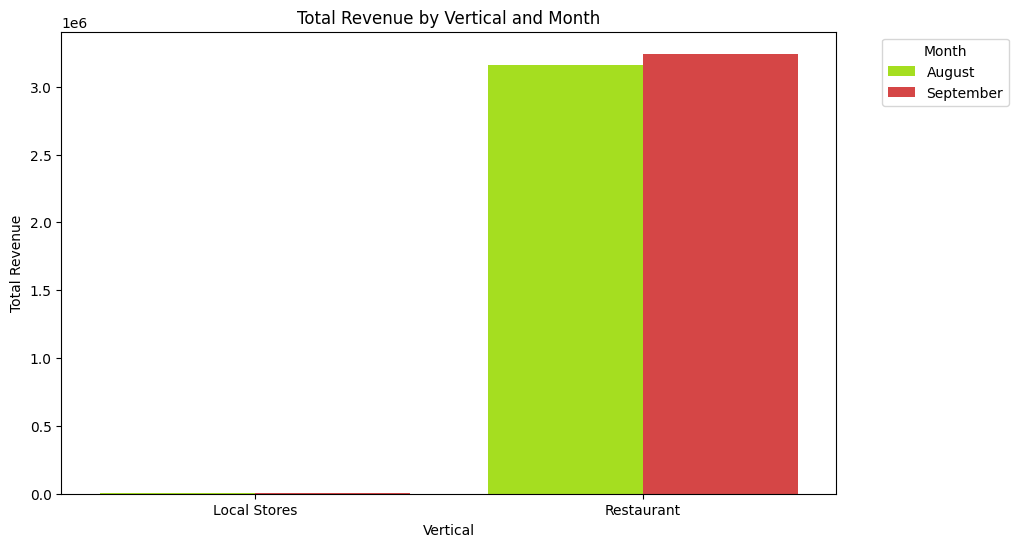

In [24]:
# Visualization: Total Revenue by 'vertical' and 'month'
plt.figure(figsize=(10, 6))
colors = ['#b2fe00', '#ed2e2e']
sns.barplot(x='vertical', y='amount', hue='month_name', data=revenue_by_vertical_and_month, palette=colors)

plt.title('Total Revenue by Vertical and Month')
plt.xlabel('Vertical')
plt.ylabel('Total Revenue')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

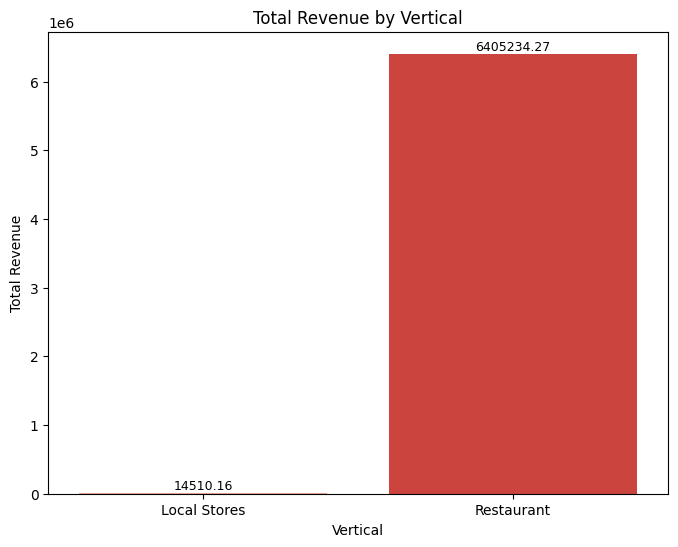

In [25]:
# Visualization: Total Revenue by 'vertical' in total
plt.figure(figsize=(8, 6))
sns.barplot(x='vertical', y='amount', data=total_revenue_by_vertical, palette='Reds', edgecolor=None)

# Add annotations for the amount on top of each bar
for index, value in enumerate(total_revenue_by_vertical['amount']):
    plt.text(index, value + 0.1, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

plt.title('Total Revenue by Vertical')
plt.xlabel('Vertical')
plt.ylabel('Total Revenue')
plt.show()

# **Which type of Cuisine generate more Revenue**

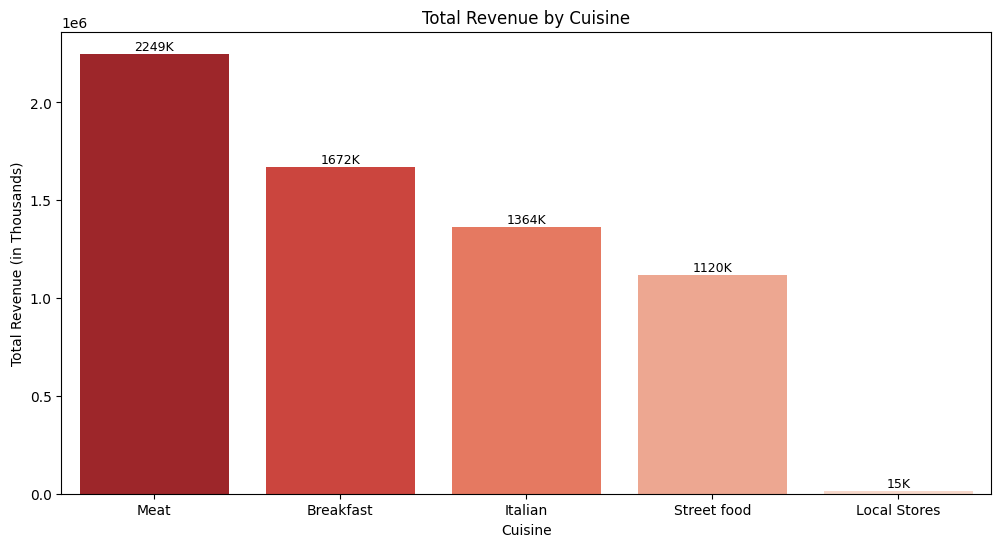

In [26]:
# Group by 'cuisine' and calculate the total revenue for each cuisine
revenue_by_cuisine = df.groupby('cuisine')['amount'].sum().reset_index()

# Sort the DataFrame by total revenue in descending order
revenue_by_cuisine = revenue_by_cuisine.sort_values(by='amount', ascending=False)

# Visualization: Total Revenue by Cuisine with adjustments
plt.figure(figsize=(12, 6))
sns.barplot(x='cuisine', y='amount', data=revenue_by_cuisine, palette=sns.color_palette("Reds_r", n_colors=len(revenue_by_cuisine)), edgecolor=None)

# Add annotations for the amount on top of each bar
for index, value in enumerate(revenue_by_cuisine['amount']):
    plt.text(index, value + 1000, f'{value/1000:.0f}K', ha='center', va='bottom', fontsize=9)

plt.title('Total Revenue by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Total Revenue (in Thousands)')
plt.show()

# **What time and day efood has the most orders and what how much was the revenue for each time**

In [27]:
# Find the day and hour with the most orders
most_orders_day_hour = df.groupby(['month_name','day_of_week', 'hour'])['order_id'].count().idxmax()
most_orders_month, most_orders_day, most_orders_hour = most_orders_day_hour

# Filter the DataFrame for the day and hour with the most orders
most_orders_df = df[(df['day_of_week'] == most_orders_day) & (df['hour'] == most_orders_hour)]

# Calculate the total revenue for those orders
total_revenue_most_orders = most_orders_df['amount'].sum()

# Display the result
most_orders_month, most_orders_day, most_orders_hour, total_revenue_most_orders
print('The peak time for efood orders was', most_orders_day, 'at', most_orders_hour, 'in', most_orders_month, 'generating a total revenue of', total_revenue_most_orders)

The peak time for efood orders was Friday at 21 in September generating a total revenue of 134648.26


In [28]:
# Group by city, day_of_week, and hour, and calculate the count and total revenue
orders_by_city_day_hour = df.groupby(['city', 'day_of_week', 'hour'])['amount'].agg(['count', 'sum']).reset_index()

# Find the row with the most orders in each city
most_orders_by_city = orders_by_city_day_hour.loc[orders_by_city_day_hour.groupby('city')['count'].idxmax()]

# Display the result
most_orders_by_city

,city,day_of_week,hour,count,sum
40,Άρτα,Saturday,10,210,1103.60
221,Αίγιο,Thursday,21,397,5929.60
283,Αγρίνιο,Friday,21,1465,16955.10
580,Αλεξανδρούπολη,Wednesday,21,825,11645.00
658,Αμαλιάδα,Tuesday,11,29,161.00
685,Αράχωβα,Friday,21,3,44.50
817,Διδυμότειχο,Tuesday,21,136,1373.80
943,Δράμα,Thursday,21,816,10453.79
1042,Ζάκυνθος,Saturday,21,186,4158.16
1156,Ηγουμενίτσα,Saturday,21,35,784.65


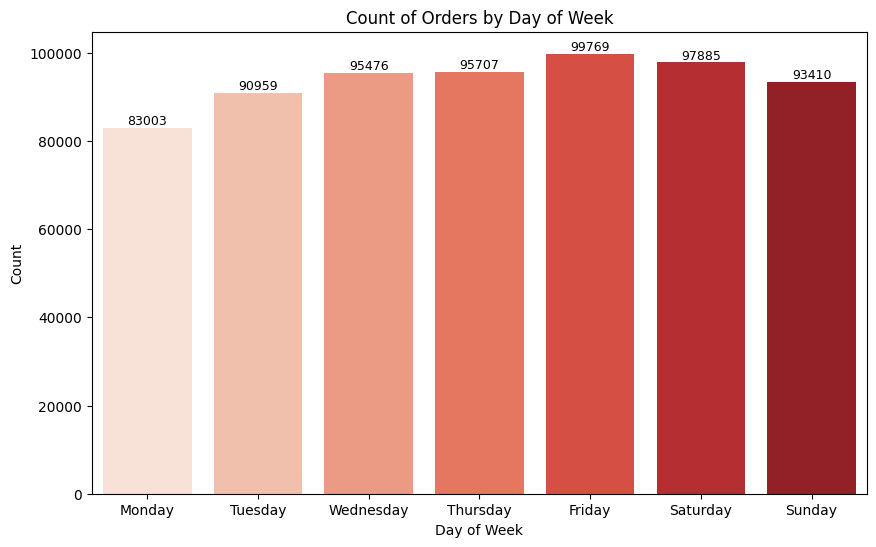

In [29]:
# Group by day_of_week and calculate the count
day_of_week_count = df['day_of_week'].value_counts().reset_index()

# Rename the columns for better readability
day_of_week_count.columns = ['day_of_week', 'count']

# Sort the days of the week in the correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_count['day_of_week'] = pd.Categorical(day_of_week_count['day_of_week'], categories=days_order, ordered=True)
day_of_week_count = day_of_week_count.sort_values('day_of_week')

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='count', data=day_of_week_count, palette='Reds', edgecolor=None)

# Add annotations at the top of each bar
for index, value in enumerate(day_of_week_count['count']):
    plt.text(index, value + 0.1, f'{value}', ha='center', va='bottom', fontsize=9)

# Customize the plot
plt.title('Count of Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')

# Show the plot
plt.show()

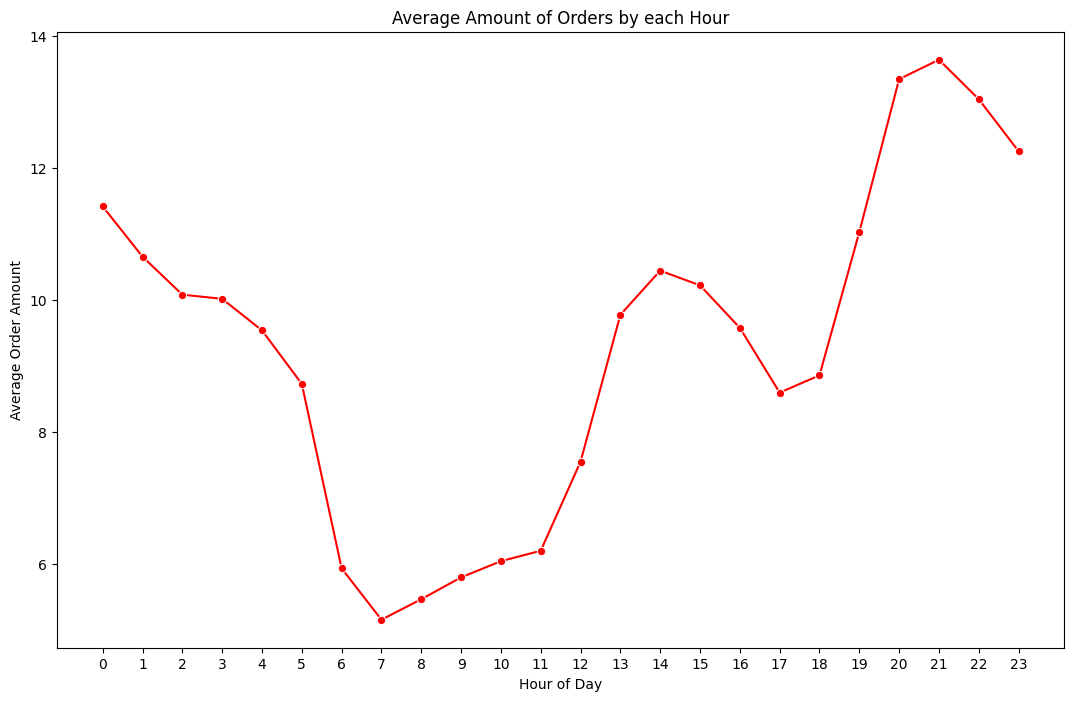

In [30]:
# Group by hour and calculate the mean of order amounts, then reset the index
hourly_avg_amount = df.groupby('hour')['amount'].mean().reset_index()

# Define all available hours in a day
all_hours = range(24)

# Merge with all hours to fill missing values and set the order
hourly_avg_amount = pd.merge(pd.DataFrame(all_hours, columns=['hour']), hourly_avg_amount, on='hour', how='left')

# Create a line plot using Seaborn
plt.figure(figsize=(13, 8))
sns.lineplot(x='hour', y='amount', data=hourly_avg_amount, marker='o', color='red')

# Customize the plot
plt.title('Average Amount of Orders by each Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Order Amount')

# Set the x-axis ticks to show all hours
plt.xticks(all_hours)

# Show the plot
plt.show()

# **Total revenue by devices**

In [31]:
# Group by 'device' and sum the income for each device
total_income_by_device = df.groupby('device')['amount'].sum().reset_index()

# Display the results
total_income_by_device

,device,amount
0,Android,3068148.39
1,Desktop,373591.97
2,MobWeb,509796.88
3,iOS,2468207.19


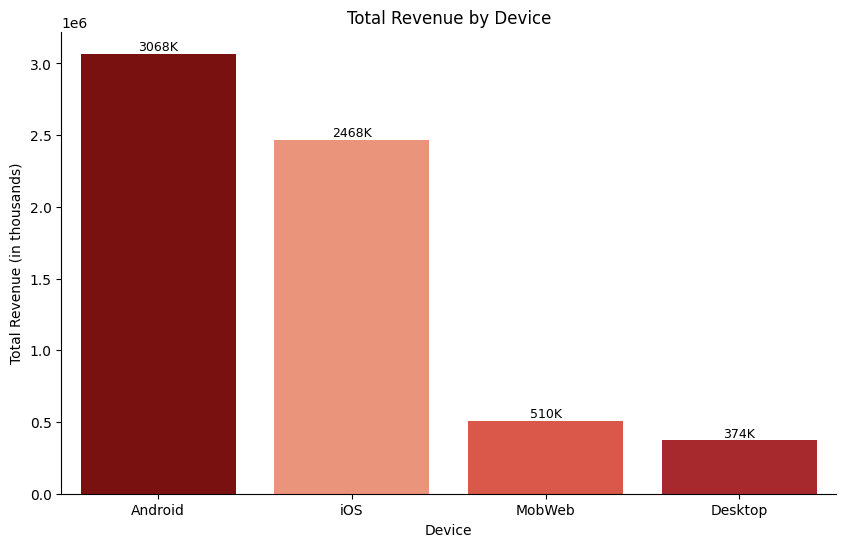

In [32]:
# Sort the DataFrame by 'amount' in descending order
total_income_by_device_sorted = total_income_by_device.sort_values(by='amount', ascending=False)

# Set the size of the columns (adjust the value as needed)
bins = 10

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))

# Define the color palette with intense red for the largest amount
colors = sns.color_palette('Reds', n_colors=len(total_income_by_device_sorted))
colors[0] = 'darkred'  # Set the first color to darkred

# Set edge color to 'None' to remove the black lines
sns.barplot(x='device', y='amount', data=total_income_by_device_sorted, palette=colors, edgecolor=None)

# Add annotations for the amount on top of each bar
for index, value in enumerate(total_income_by_device_sorted['amount']):
    plt.text(index, value + 1000, f'{value/1000:.0f}K', ha='center', va='bottom', fontsize=9)

# Customize the plot
plt.title('Total Revenue by Device')
plt.xlabel('Device')
plt.ylabel('Total Revenue (in thousands)')

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

# **Which user category tend to spend more money ?**

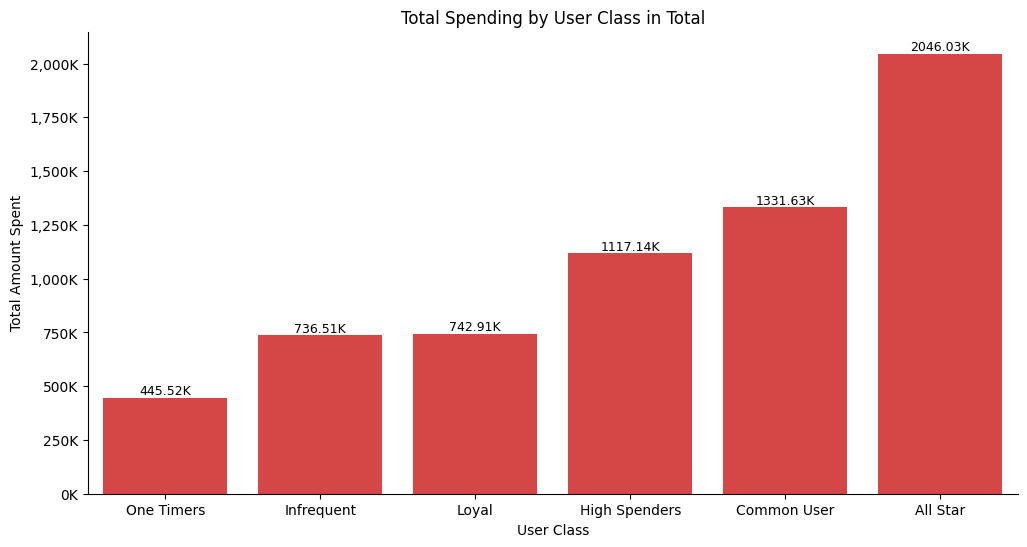

In [33]:
# Group by 'user_class_name' and sum the 'amount' for each category
total_spending_by_category = df.groupby('user_class_name')['amount'].sum().reset_index()

# Sort the DataFrame by 'amount' in descending order
total_spending_by_category_sorted = total_spending_by_category.sort_values(by='amount', ascending=True)

# Set the size of the columns (adjust the value as needed)
bins = 10

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))

# Set edge color to 'None' to remove the black lines
sns.barplot(x='user_class_name', y='amount', data=total_spending_by_category_sorted, color='#ed2e2e', edgecolor=None)

# Add annotations for the amount on top of each bar
for index, value in enumerate(total_spending_by_category_sorted['amount']):
    plt.text(index, value + 1000, f'{value/1000:.2f}K', ha='center', va='bottom', fontsize=9)

# Customize the plot
plt.title('Total Spending by User Class in Total')
plt.xlabel('User Class')
plt.ylabel('Total Amount Spent')

# Format y-axis labels in thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1000)) + "K"))

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

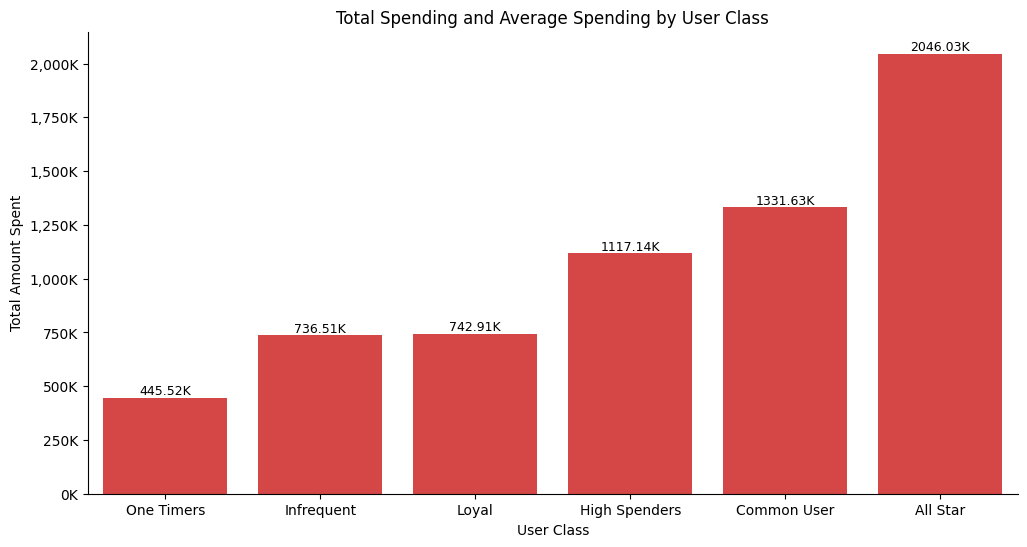

In [34]:
# Calculate the average amount per user class
average_spending_by_class = total_spending_by_category.groupby('user_class_name')['amount'].mean().reset_index()

# Sort the DataFrame by 'amount' in descending order
average_spending_by_class_sorted = average_spending_by_class.sort_values(by='amount', ascending=True)

# Set the size of the columns (adjust the value as needed)
bins = 10

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))

# Set edge color to 'None' to remove the black lines
sns.barplot(x='user_class_name', y='amount', data=total_spending_by_category_sorted, color='#ed2e2e', edgecolor=None)

# Add annotations for the amount on top of each bar
for index, value in enumerate(total_spending_by_category_sorted['amount']):
    plt.text(index, value + 1000, f'{value/1000:.2f}K', ha='center', va='bottom', fontsize=9)



# Customize the plot
plt.title('Total Spending and Average Spending by User Class')
plt.xlabel('User Class')
plt.ylabel('Total Amount Spent')

# Format y-axis labels in thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1000)) + "K"))

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()


# **How customers choose to pay for their order based on their device**

In [35]:
# Group by 'device' and 'paid_cash', calculate the count of users for each combination
payment_method_counts = df.groupby(['device', 'payment_method']).size().reset_index(name='count')

# Pivot the DataFrame to get 'cash' and 'epayment' columns
payment_method_counts_pivot = payment_method_counts.pivot(index='device', columns='payment_method', values='count').reset_index()

# Rename the columns for clarity
payment_method_counts_pivot.columns = ['device', 'cash', 'online']

# Display the result
payment_method_counts_pivot

,device,cash,online
0,Android,149433,166176
1,Desktop,19648,19355
2,MobWeb,21651,29909
3,iOS,118093,131944


<Figure size 1300x600 with 0 Axes>

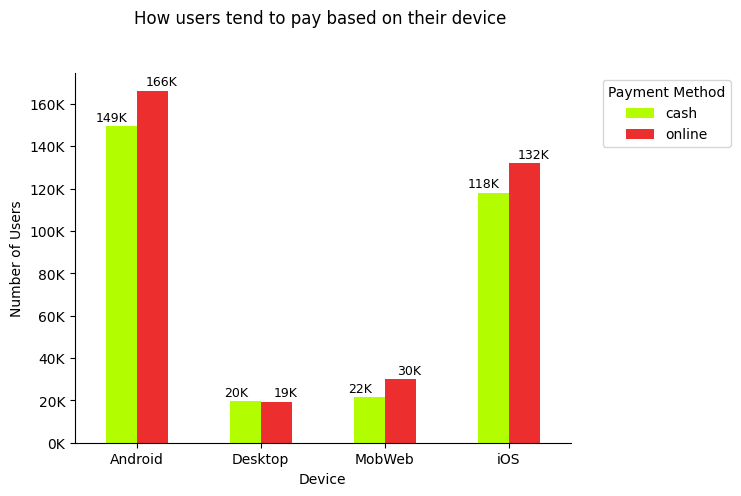

In [36]:
# Set the figure size
plt.figure(figsize=(13, 6))
colors = ['#b2fe00', '#ed2e2e']

# Plot the grouped bar chart
payment_method_counts_pivot.plot(kind='bar', x='device', y=['cash', 'online'], color=colors, rot=0)

# Add annotations for each bar
for i, device in enumerate(payment_method_counts_pivot['device']):
    plt.text(i - 0.2, payment_method_counts_pivot.loc[i, 'cash'] + 1000,
             f'{payment_method_counts_pivot.loc[i, "cash"] / 1000:.0f}K', ha='center', va='bottom', fontsize=9)

    plt.text(i + 0.2, payment_method_counts_pivot.loc[i, 'online'] + 1000,
             f'{payment_method_counts_pivot.loc[i, "online"] / 1000:.0f}K', ha='center', va='bottom', fontsize=9)

# Customize the plot
plt.title('How users tend to pay based on their device \n \n')
plt.xlabel('Device')
plt.ylabel('Number of Users')

# Set y-axis labels in thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1000)) + "K"))

# Remove the top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Remove the grid lines
plt.grid(False)
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
# Show the plot
plt.show()

In [37]:
# Group by 'vertical' and 'payment_method', and count the occurrences
payment_method_counts = df.groupby(['vertical', 'payment_method']).size().reset_index(name='count')

# Find the index of the maximum count for each 'vertical'
max_count_indices = payment_method_counts.groupby('vertical')['count'].idxmax()

# Extract the rows with the most common payment method for each 'vertical'
most_common_payment_methods = payment_method_counts.loc[max_count_indices]

# Display the result
most_common_payment_methods

,vertical,payment_method,count
0,Local Stores,0,469
3,Restaurant,1,347087


In [38]:

fig = px.bar(most_common_payment_methods, x='vertical', y='count', color='payment_method',
             title='Most Common Payment Methods by Vertical',
             labels={'count': 'Number of Occurrences', 'vertical': 'Vertical'},
             #color_discrete_map={'card': 'blue', 'cash': 'green'}
             )

# Update layout options
fig.update_layout(
    autosize=True,  # Set to False for fixed size
    width=800,      # Set the initial width
    height=500,     # Set the initial height
    title=dict(text='Most Common Payment Methods by Vertical', x=0.5),
    xaxis=dict(title='Vertical'),
    yaxis=dict(title='Number of Occurrences')
)

# Show the interactive plot
fig.show()

In [39]:
# Group by 'vertical' and 'payment_method', and count the occurrences
payment_method_counts = df.groupby(['vertical', 'payment_method']).size().reset_index(name='count')

# Find the total count for each 'vertical'
total_counts = payment_method_counts.groupby('vertical')['count'].transform('sum')

# Find the index of the maximum count for each 'vertical'
max_count_indices = payment_method_counts.groupby('vertical')['count'].idxmax()

# Extract the rows with the most common payment method for each 'vertical'
most_common_payment_methods = payment_method_counts.loc[max_count_indices]

# Calculate the percentage of the most common payment method for each 'vertical'
most_common_payment_methods['percentage %'] = ((most_common_payment_methods['count'] / total_counts) * 100).round(2)

# Display the result
most_common_payment_methods

,vertical,payment_method,count,percentage %
0,Local Stores,0,469,61.23
3,Restaurant,1,347087,52.95


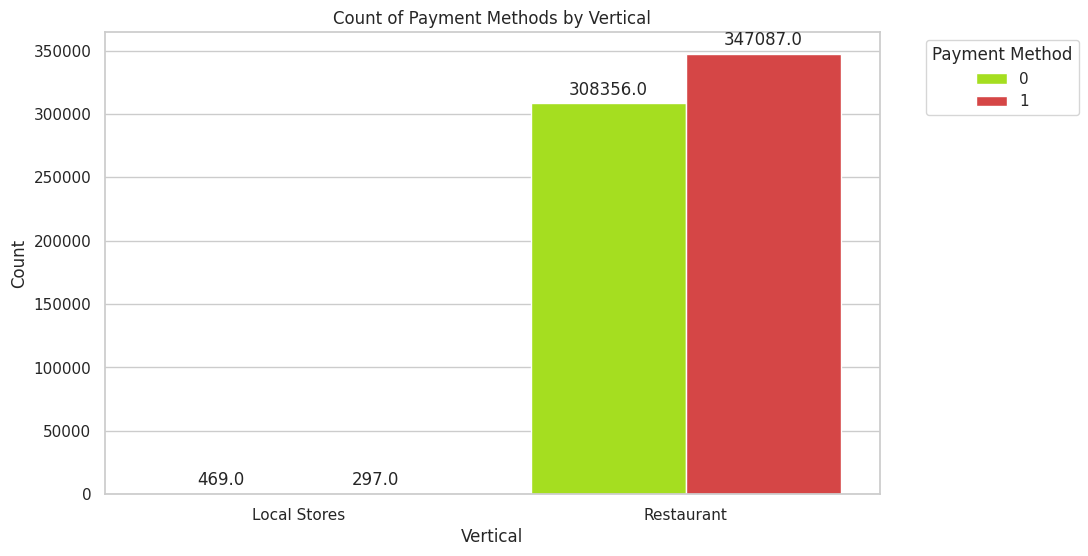

In [40]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Plot for Count of Payment Methods
plt.figure(figsize=(10, 6))
count_plot = sns.barplot(x='vertical', y='count', hue='payment_method',data=payment_method_counts,palette=colors, edgecolor=None)
plt.title('Count of Payment Methods by Vertical')
plt.xlabel('Vertical')
plt.ylabel('Count')
plt.legend(title='Payment Method')

# Move legend to the right
count_plot.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add annotations for the count on top of each bar
for p in count_plot.patches:
    count_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

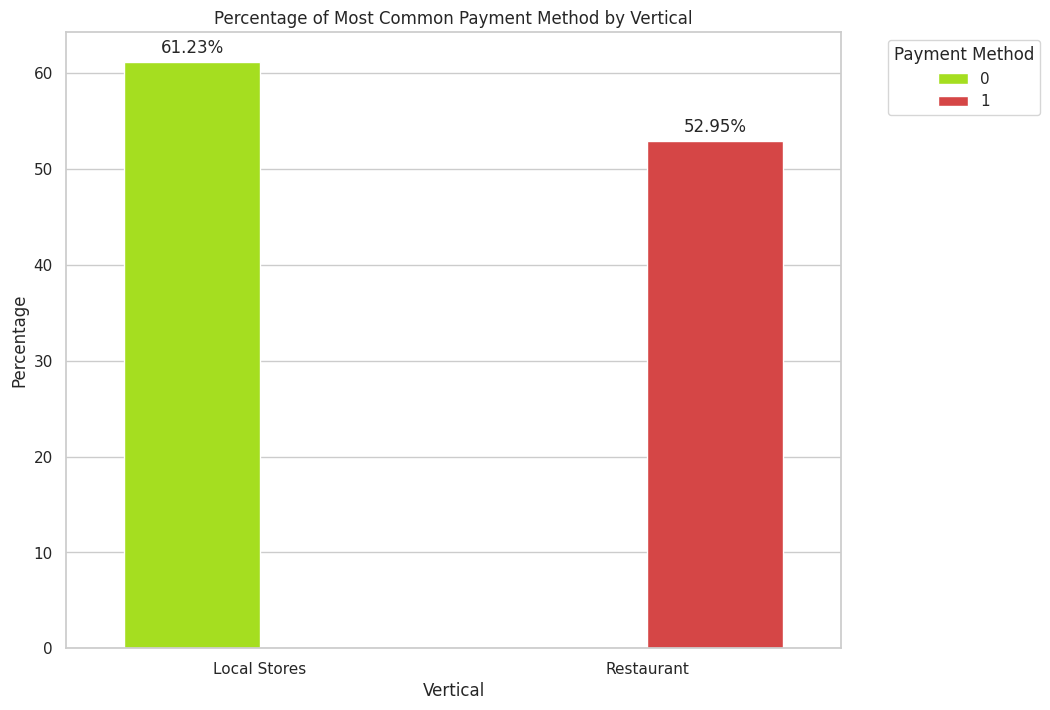

In [41]:
# Plot for Percentage of Most Common Payment Method with Smaller Columns
plt.figure(figsize=(10, 8))

percentage_plot = sns.barplot(
    x='vertical',
    y='percentage %',
    data=most_common_payment_methods,
    width=0.7,
    palette=colors,
    edgecolor=None,
    hue='payment_method'
)
plt.title('Percentage of Most Common Payment Method by Vertical')
plt.xlabel('Vertical')
plt.ylabel('Percentage')

# Add annotations for the percentage on top of each bar
for p in percentage_plot.patches:
    percentage_plot.annotate(
        f'{p.get_height():.2f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

# Move legend to the right
percentage_plot.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [42]:
# Group by 'city' and calculate total order count and total revenue
city_orders_amount_revenue = df.groupby('city').agg({'order_id': 'count', 'amount': 'sum'}).reset_index()
city_orders_amount_revenue.rename(columns={'order_id': 'order_count', 'amount': 'total_revenue'}, inplace=True)

# Sort the DataFrame by 'order_count' in descending order
top_4_city_orders_amount_revenue = city_orders_amount_revenue.sort_values(by='order_count', ascending=False).head(4)

# Display the result
top_4_city_orders_amount_revenue

,city,order_count,total_revenue
13,Ρόδος,160471,1884377.54
10,Ιωάννινα,120035,1304928.13
11,Ξάνθη,106317,864371.39
2,Αγρίνιο,82262,595521.88


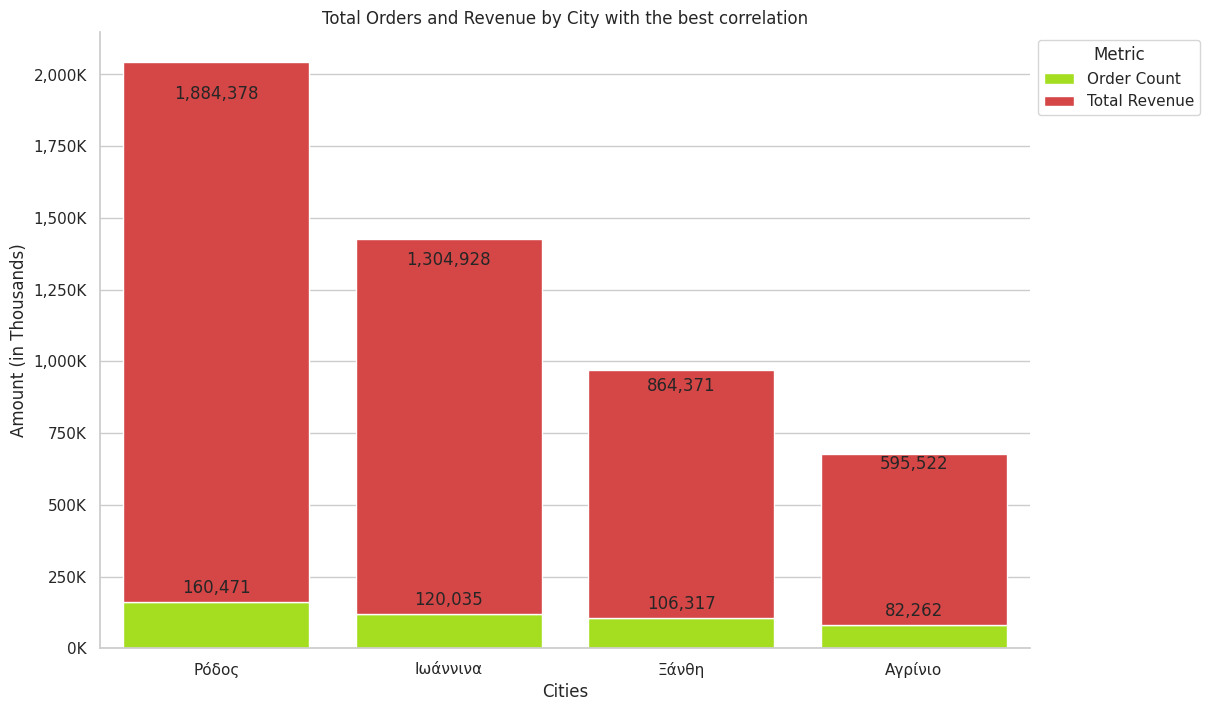

In [43]:
plt.figure(figsize=(12, 8))

# Set color palette with green (#b2fe00) for order count and intense red (#ed2e2e) for total revenue
colors = ['#b2fe00', '#ed2e2e']

# Create a grouped bar plot
ax = sns.barplot(x='city', y='order_count', data=top_4_city_orders_amount_revenue, color=colors[0], label='Order Count')
ax = sns.barplot(x='city', y='total_revenue', data=top_4_city_orders_amount_revenue, color=colors[1], label='Total Revenue', bottom=top_4_city_orders_amount_revenue['order_count'])

# Move the legend to the right side
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Metric')

# Add annotations for the count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set y-axis labels in thousands
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1000)) + "K"))

# Customize the plot
plt.title('Total Orders and Revenue by City with the best correlation')
plt.xlabel('Cities')
plt.ylabel('Amount (in Thousands)')

# Remove the top and right spines for a cleaner look
sns.despine()

plt.show()

# **Average amount of money per user class by vertical**

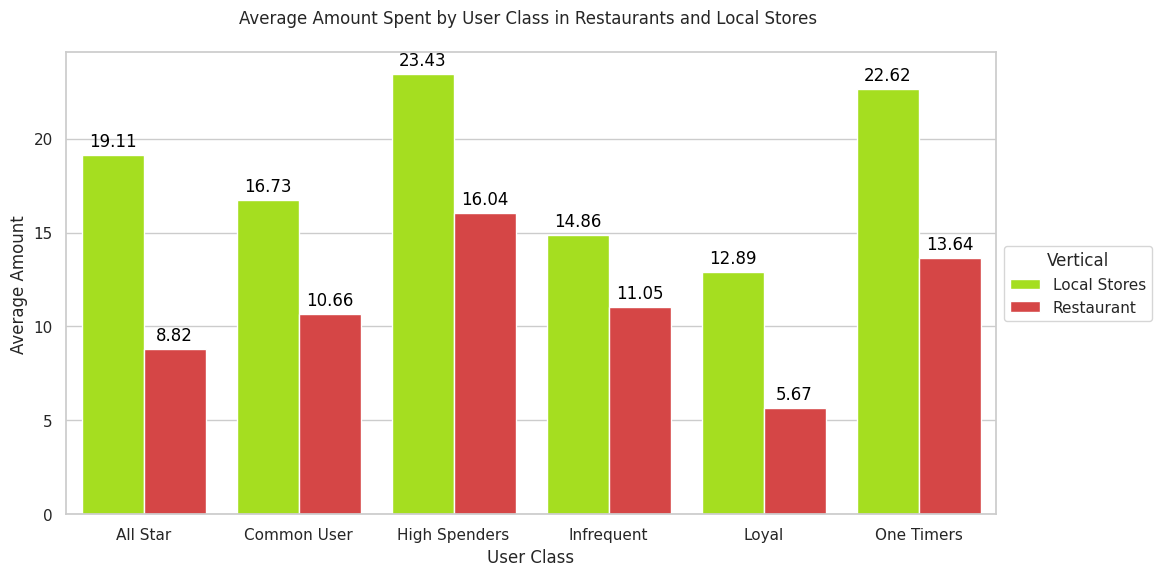

In [44]:
# Filter the DataFrame for 'Restaurant' and 'Local Store' verticals
restaurant_local_data = df[df['vertical'].isin(['Restaurant', 'Local Stores'])]

# Group by 'user_class_name' and 'vertical' to calculate average amount
average_amount_by_user_class = restaurant_local_data.groupby(['user_class_name', 'vertical'])['amount'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))
colors = ['#b2fe00', '#ed2e2e']

# Plot the bar graph
sns.barplot(x='user_class_name', y='amount', hue='vertical', data=average_amount_by_user_class, palette=colors)

# Add text annotations for average values on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='black')

# Customize the plot
plt.title('Average Amount Spent by User Class in Restaurants and Local Stores \n')
plt.xlabel('User Class')
plt.ylabel('Average Amount')
plt.legend(title='Vertical', loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

## **Deliveries costs by efood and stores**

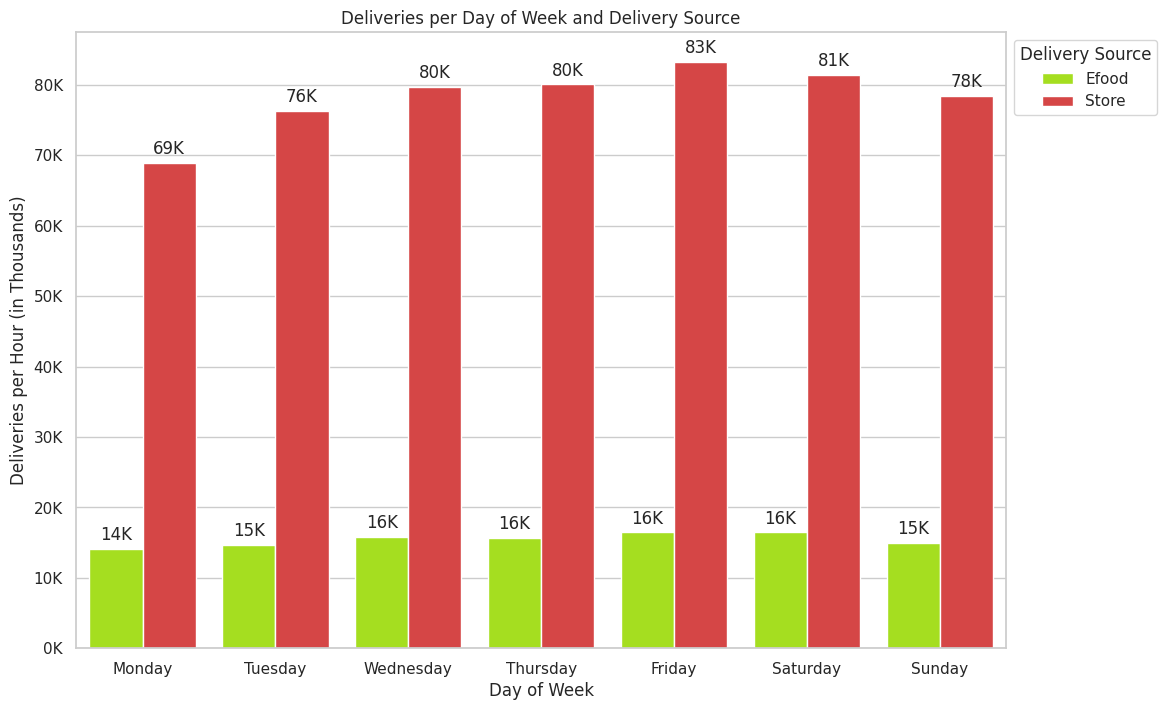

In [45]:
# Assuming you have df and you want to create delivery_counts
df['delivery_source'] = np.where(df['delivery_cost'] == 0, 'Store', 'Efood')

delivery_counts = df.groupby(['day_of_week', 'delivery_source']).size().reset_index(name='count')

# Define the order of days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'day_of_week' to a categorical variable with the custom order
delivery_counts['day_of_week'] = pd.Categorical(delivery_counts['day_of_week'], categories=days_order, ordered=True)

plt.figure(figsize=(12, 8))

# Set color palette with red color for Efood and intense red for Store
colors = ['#b2fe00', '#ed2e2e']
sns.set_palette(sns.color_palette(colors))

# Create a grouped bar plot sorted by day_of_week
ax = sns.barplot(x='day_of_week', y='count', hue='delivery_source', data=delivery_counts)

# Move the legend to the right side
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Delivery Source')

# Add annotations for the count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()/1000:.0f}K', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set y-axis labels in thousands
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1000)) + "K"))

plt.title('Deliveries per Day of Week and Delivery Source')
plt.xlabel('Day of Week')
plt.ylabel('Deliveries per Hour (in Thousands)')

plt.show()

# **In which cuisine efood gives the most coupons ?**

In [46]:
# Filter the data for coupons provided by efood
coupons_by_cuisine = df[df['coupon_discount_amount'] > 0]

# Group by 'cuisine' and calculate the total coupon amount
coupons_by_cuisine_total = coupons_by_cuisine.groupby('cuisine')['coupon_discount_amount'].sum().reset_index()

# Find the cuisine with the maximum total coupon amount
most_coupons_cuisine = coupons_by_cuisine_total.loc[coupons_by_cuisine_total['coupon_discount_amount'].idxmax()]

print("The cuisine with the most coupons from efood is:", most_coupons_cuisine['cuisine'])

The cuisine with the most coupons from efood is: Breakfast


In [47]:
# Filter the data for coupons provided by efood
coupons_by_vertical = df[df['coupon_discount_amount'] > 0]

# Group by 'vertical' and calculate the total coupon amount
coupons_by_vertical_total = coupons_by_vertical.groupby('vertical')['coupon_discount_amount'].sum().reset_index()

# Find the vertical with the maximum total coupon amount
most_coupons_vertical = coupons_by_vertical_total.loc[coupons_by_vertical_total['coupon_discount_amount'].idxmax()]

print("The vertical with the most coupons from efood is:", most_coupons_vertical['vertical'])

The vertical with the most coupons from efood is: Restaurant


In [48]:
# Verticals

# Filter the data for coupons provided by efood
coupons_by_vertical = df[df['coupon_discount_amount'] > 0]

# Group by 'vertical' and calculate the total coupon amount
coupons_by_vertical_total = coupons_by_vertical.groupby('vertical')['coupon_discount_amount'].sum().reset_index()

print("Coupons by Vertical:")
coupons_by_vertical_total

Coupons by Vertical:


,vertical,coupon_discount_amount
0,Local Stores,280.68
1,Restaurant,51976.02


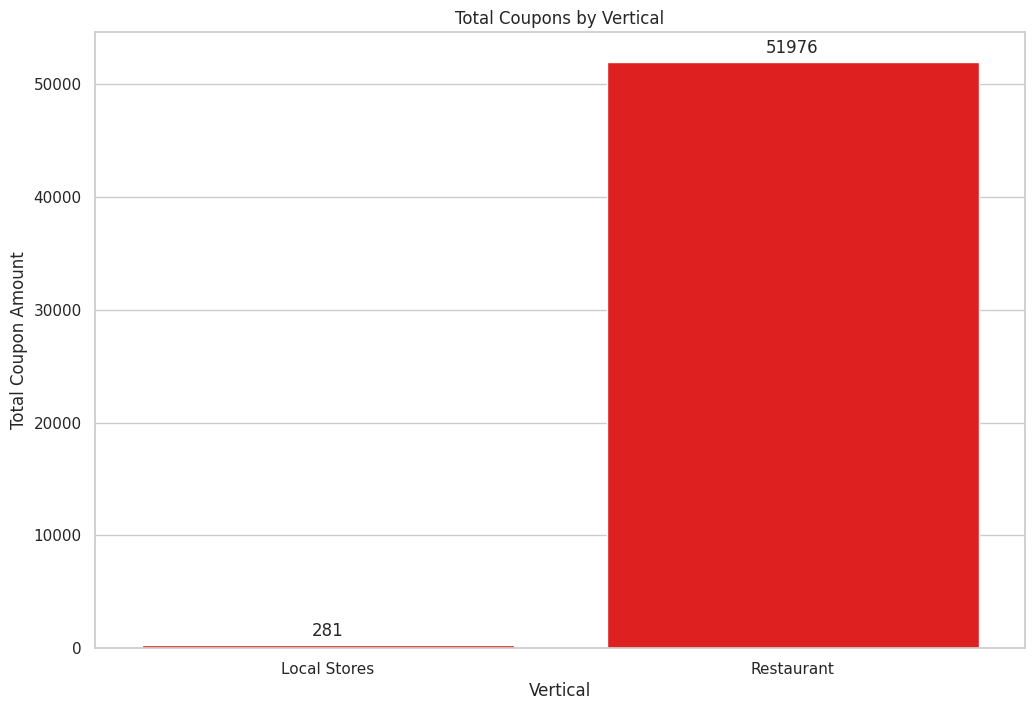

In [49]:
# Plot for Coupons by Vertical
plt.figure(figsize=(12, 8))
vertical_coupons_plot = sns.barplot(x='vertical', y='coupon_discount_amount', data=coupons_by_vertical_total, color='red')
plt.title('Total Coupons by Vertical')
plt.xlabel('Vertical')
plt.ylabel('Total Coupon Amount')

# Add annotations for the coupon amount on top of each bar
for p in vertical_coupons_plot.patches:
    vertical_coupons_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [50]:
# Cuisines

# Filter the data for coupons provided by efood
coupons_by_cuisine = df[df['coupon_discount_amount'] > 0]

# Sort the DataFrame by 'coupon_discount_amount' in descending order
coupons_by_cuisine = coupons_by_cuisine_total.sort_values(by='coupon_discount_amount', ascending=False)

# Group by 'cuisine' and calculate the total coupon amount
coupons_by_cuisine_total = coupons_by_cuisine.groupby('cuisine')['coupon_discount_amount'].sum().reset_index()

coupons_by_cuisine_total

,cuisine,coupon_discount_amount
0,Breakfast,18099.60
1,Italian,10030.58
2,Local Stores,280.68
3,Meat,13571.06
4,Street food,10274.78


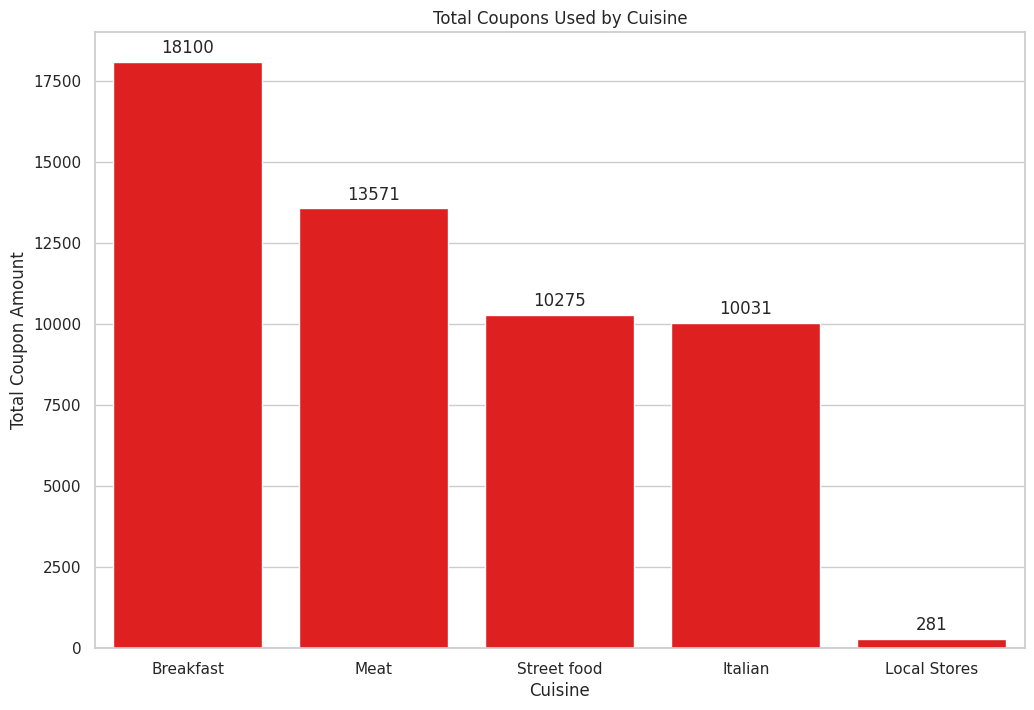

In [51]:
# Sort the DataFrame by 'coupon_discount_amount' in descending order
coupons_by_cuisine_total_sorted = coupons_by_cuisine_total.sort_values(by='coupon_discount_amount', ascending=False)

# Plot for Coupons by Cuisine
plt.figure(figsize=(12, 8))
cuisine_coupons_plot = sns.barplot(x='cuisine', y='coupon_discount_amount', data=coupons_by_cuisine_total_sorted, color='red')

plt.title('Total Coupons Used by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Total Coupon Amount')

# Add annotations for the coupon amount on top of each bar
for p in cuisine_coupons_plot.patches:
    cuisine_coupons_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# **Top 5 cities based on the amount of orders and the revenue they**


In [52]:
# Group by 'city' and calculate total order count and total revenue
city_orders_amount_revenue = df.groupby('city').agg({'order_id': 'count', 'amount': 'sum'}).reset_index()
city_orders_amount_revenue.rename(columns={'order_id': 'order_count', 'amount': 'total_revenue'}, inplace=True)

# Sort the DataFrame by 'order_count' in descending order
top_4_city_orders_amount_revenue = city_orders_amount_revenue.sort_values(by='order_count', ascending=False).head(4)

# Display the result
top_4_city_orders_amount_revenue

,city,order_count,total_revenue
13,Ρόδος,160471,1884377.54
10,Ιωάννινα,120035,1304928.13
11,Ξάνθη,106317,864371.39
2,Αγρίνιο,82262,595521.88


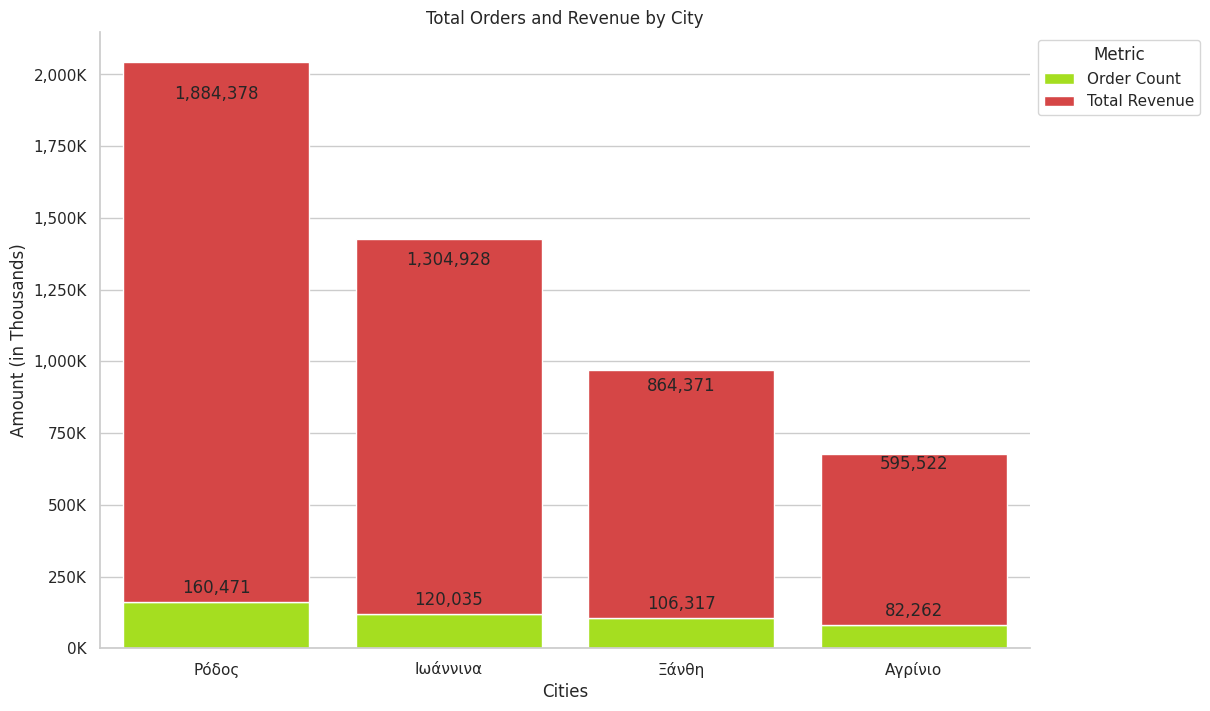

In [53]:
plt.figure(figsize=(12, 8))

# Set color palette with green (#b2fe00) for order count and intense red (#ed2e2e) for total revenue
colors = ['#b2fe00', '#ed2e2e']

# Create a grouped bar plot
ax = sns.barplot(x='city', y='order_count', data=top_4_city_orders_amount_revenue, color=colors[0], label='Order Count')
ax = sns.barplot(x='city', y='total_revenue', data=top_4_city_orders_amount_revenue, color=colors[1], label='Total Revenue', bottom=top_4_city_orders_amount_revenue['order_count'])

# Move the legend to the right side
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Metric')

# Add annotations for the count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set y-axis labels in thousands
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1000)) + "K"))

# Customize the plot
plt.title('Total Orders and Revenue by City')
plt.xlabel('Cities')
plt.ylabel('Amount (in Thousands)')

# Remove the top and right spines for a cleaner look
sns.despine()

plt.show()

# **Which user category gets the most coupons per class**

In [54]:
# Group by 'user_class_name' and 'vertical' to calculate the total number of coupons per user class and vertical
coupons_by_user_class_vertical = df.groupby(['user_class_name', 'vertical'])['coupon_discount_amount'].count().reset_index()

# Find the user in each user class with the most coupons in each vertical
max_coupons_by_user_class_vertical = coupons_by_user_class_vertical.loc[coupons_by_user_class_vertical.groupby(['user_class_name', 'vertical'])['coupon_discount_amount'].idxmax()]
max_coupons_by_user_class_vertical

,user_class_name,vertical,coupon_discount_amount
0,All Star,Local Stores,334
1,All Star,Restaurant,231165
2,Common User,Local Stores,126
3,Common User,Restaurant,124753
4,High Spenders,Local Stores,157
5,High Spenders,Restaurant,69423
6,Infrequent,Local Stores,70
7,Infrequent,Restaurant,66573
8,Loyal,Local Stores,50
9,Loyal,Restaurant,130917


In [55]:
# Group by 'user_class_name' and calculate total coupon amount
coupons_by_user_class = df.groupby('user_class_name')['coupon_discount_amount'].sum().reset_index()

# Sort the DataFrame by 'coupon_discount_amount' in descending order
coupons_by_user_class_sorted = coupons_by_user_class.sort_values(by='coupon_discount_amount', ascending=False)

# Display the result
coupons_by_user_class_sorted

,user_class_name,coupon_discount_amount
0,All Star,21065.90
4,Loyal,8657.86
5,One Timers,7934.12
1,Common User,6024.43
2,High Spenders,4448.72
3,Infrequent,4125.67


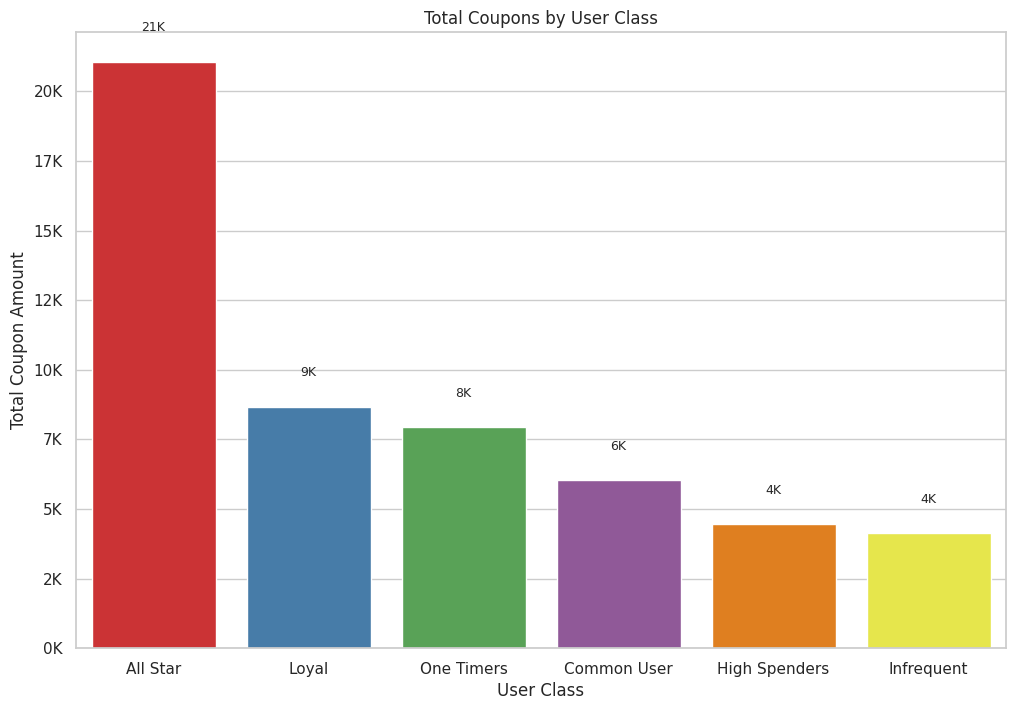

In [56]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Set the color palette to different colors
colors = sns.color_palette("Set1", n_colors=len(coupons_by_user_class_sorted))

# Plot the data using Seaborn
ax = sns.barplot(
    x='user_class_name',
    y='coupon_discount_amount',
    data=coupons_by_user_class_sorted,
    palette=colors,
    edgecolor=None,
)

# Add annotations for the count on top of each bar
for index, value in enumerate(coupons_by_user_class_sorted['coupon_discount_amount']):
    plt.text(index, value + 1000, f'{value/1000:.0f}K', ha='center', va='bottom', fontsize=9)

# Customize the plot
plt.title('Total Coupons by User Class')
plt.xlabel('User Class')
plt.ylabel('Total Coupon Amount')

# Set y-axis labels in thousands
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1000)) + "K"))

# Show the plot
plt.show()

# **What percentage of users buy only with coupons per user category**

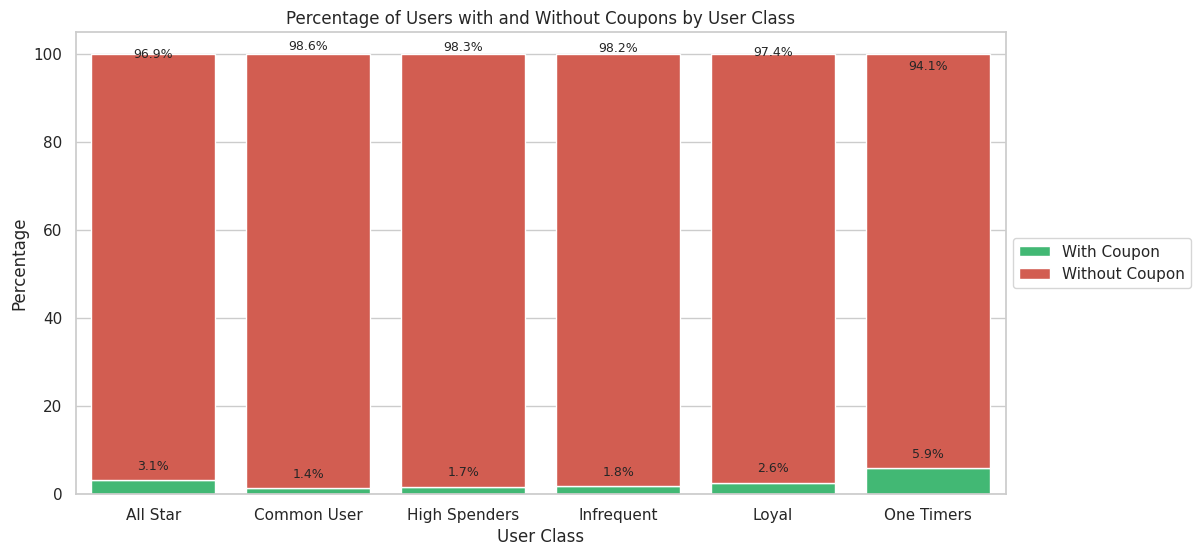

In [57]:
# Group by 'user_class_name' and calculate the percentage of users with and without coupons
coupon_percentage_by_class = df.groupby('user_class_name')['coupon_discount_amount'].apply(lambda x: (x > 0).mean() * 100).reset_index()
coupon_percentage_by_class['no_coupon_percentage'] = 100 - coupon_percentage_by_class['coupon_discount_amount']

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='user_class_name', y='coupon_discount_amount', data=coupon_percentage_by_class, color='#2ecc71', label='With Coupon')
barplot = sns.barplot(x='user_class_name', y='no_coupon_percentage', data=coupon_percentage_by_class, color='#e74c3c', label='Without Coupon', bottom=coupon_percentage_by_class['coupon_discount_amount'])

# Add labels to each bar
for p in barplot.patches:
    plt.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9)

# Customize the plot
plt.title('Percentage of Users with and Without Coupons by User Class')
plt.xlabel('User Class')
plt.ylabel('Percentage')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

# **What percentage of users have changes user class**





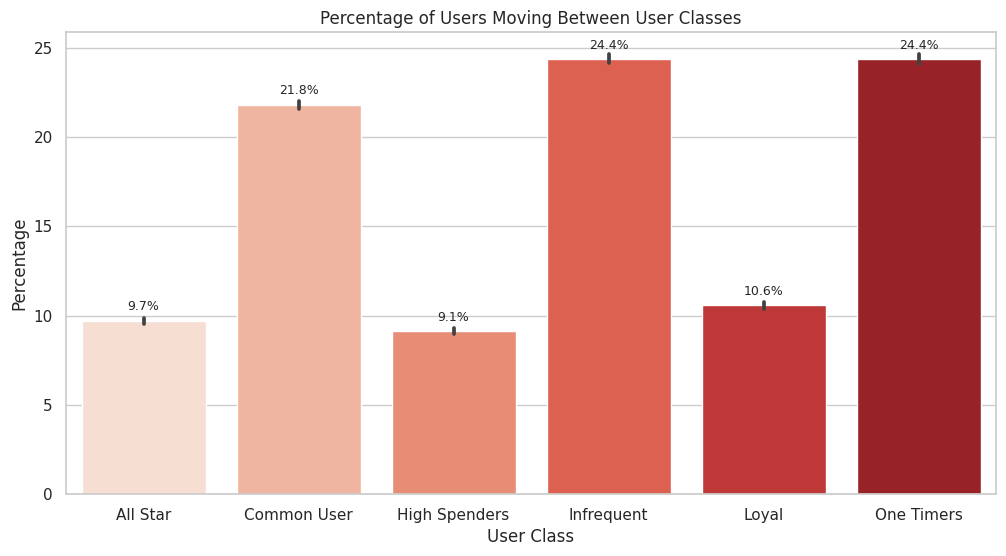

In [58]:

# Create a DataFrame with the counts of user movements between classes
user_class_changes = df.groupby(['user_id', 'user_class_name']).size().unstack().fillna(0)

# Calculate the percentage of users moving from one class to another
percentage_changes = user_class_changes.div(user_class_changes.sum(axis=1), axis=0) * 100

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=percentage_changes, palette='Reds')

# Add labels to each bar
for p in barplot.patches:
    plt.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9)

# Customize the plot
plt.title('Percentage of Users Moving Between User Classes')
plt.xlabel('User Class')
plt.ylabel('Percentage')

# Show the plot
plt.show()

# **How customers moved through the classes**

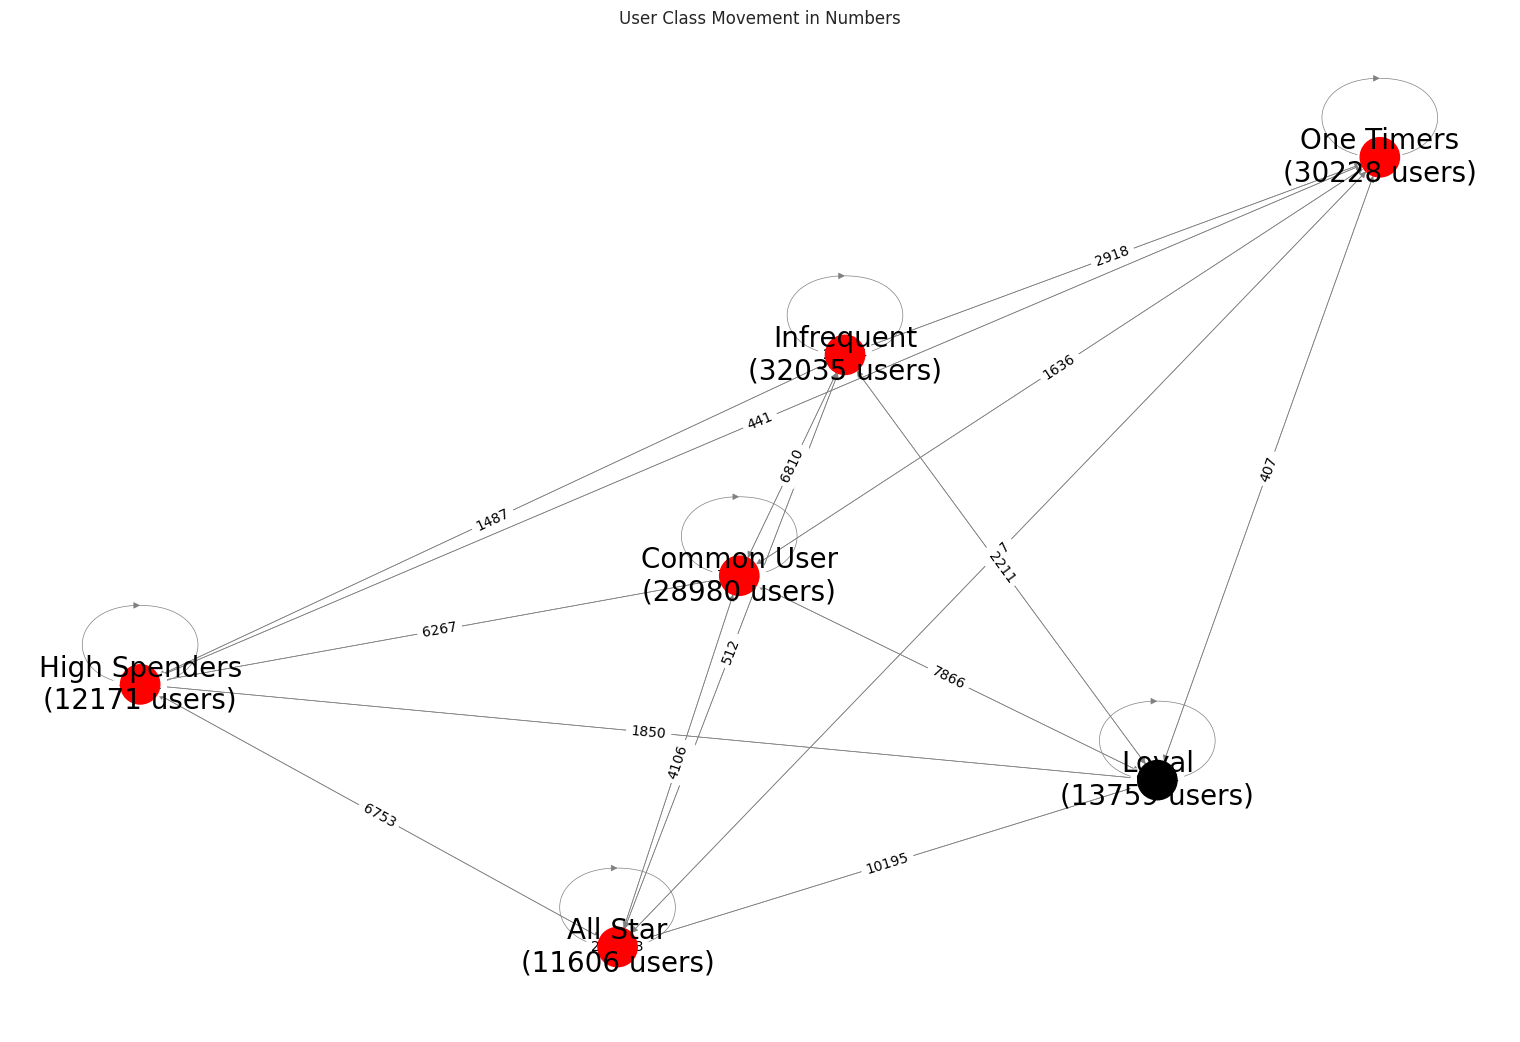

In [59]:
# Create a directed graph
G = nx.DiGraph()

# Add edges between consecutive user classes for each user
for user_id, group in df.groupby('user_id')['user_class_name']:
    classes = group.tolist()
    for i in range(len(classes) - 1):
        edge = (classes[i], classes[i + 1])
        if G.has_edge(*edge):
            G[edge[0]][edge[1]]['weight'] += 1
        else:
            G.add_edge(*edge, weight=1)

# Add nodes for each user class with counts
for node in G.nodes:
    count = len(df[df['user_class_name'] == node]['user_id'].unique())
    G.nodes[node]['count'] = count

# Draw the graph with edge weights and node counts
pos = nx.spring_layout(G, seed=42)
edge_labels = {(i, j): G[i][j]['weight'] for i, j in G.edges()}
node_colors = ['black' if node == 'Loyal' else 'red' for node in G.nodes()]

# Increase the figure size
plt.figure(figsize=(15, 10))

nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=800, font_size=8, font_color='black', font_weight='bold', edge_color='gray', width=0.5)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')
nx.draw_networkx_labels(G, pos, labels={node: f'{node}\n({G.nodes[node]["count"]} users)' for node in G.nodes}, font_size=20, font_color='black')

# Customize the plot
plt.title('User Class Movement in Numbers')
plt.show()

# **What percentage of users have made at least one order with coupon ?**

In [60]:
# Check if each user has made at least one order with a coupon
users_with_coupons = df[df['coupon_discount_amount'] > 0]['user_id'].unique()

# Calculate the percentage of users with at least one coupon order
percentage_users_with_coupons = len(users_with_coupons) / df['user_id'].nunique() * 100

# Display the result
print(f"Percentage of users with at least one coupon order: {percentage_users_with_coupons:.2f}%")

Percentage of users with at least one coupon order: 8.80%


# **Which cities have the most expensive delivery costs ?**

In [61]:
# Group by 'city' and calculate the total delivery cost for each city
city_delivery_cost = df.groupby('city')['delivery_cost'].sum().reset_index()
# Sort the DataFrame based on 'delivery_cost' in descending order
sorted_city_delivery_cost = city_delivery_cost.sort_values(by='delivery_cost', ascending=False)

# Find the city with the highest total delivery cost
most_expensive_city = city_delivery_cost.loc[city_delivery_cost['delivery_cost'].idxmax()]

# Display the result for the top city
print(f"The city with the most delivery cost is {most_expensive_city['city']} with a total cost of {most_expensive_city['delivery_cost']:.2f}")

The city with the most delivery cost is Ρόδος with a total cost of 32646.00


In [62]:
sorted_city_delivery_cost.head()

,city,delivery_cost
13,Ρόδος,32646.0
7,Δράμα,27401.8
3,Αλεξανδρούπολη,8893.2
11,Ξάνθη,7572.4
10,Ιωάννινα,5180.1


In [66]:
# Group by 'time_of_day' and calculate the total coupon discount amount
total_coupon_amount_by_period_time = df.groupby('time_of_day')['coupon_discount_amount'].sum().reset_index()

# Plot using Plotly Express
fig_coupon_amount = px.bar(total_coupon_amount_by_period_time,
                           x='time_of_day',
                           y='coupon_discount_amount',
                           title='Total Coupon Discount Amount by Time of Day',
                           labels={'coupon_discount_amount': 'Total Coupon Discount Amount', 'time_of_day': 'Time of Day'},
                           color='time_of_day',
                           color_discrete_map={'morning': 'purple', 'lunch_time': 'lightblue', 'evening': 'red'},
                           barmode='group')

# Add text annotations for the amount of coupons on top of each column
for i, value in enumerate(total_coupon_amount_by_period_time['coupon_discount_amount']):
    fig_coupon_amount.add_annotation(
        x=total_coupon_amount_by_period_time['time_of_day'][i],
        y=value,
        text=f'{value:.2f}',
        showarrow=False,
        font=dict(color='black', size=10),
        xanchor='center',
        yanchor='bottom'
    )

# Update layout options
fig_coupon_amount.update_layout(
    autosize=True,
    width=800,
    height=500,
    title=dict(text='Total Coupon Discount Amount by Time of Day', x=0.5),
    xaxis=dict(title='Time of Day'),
    yaxis=dict(title='Total Coupon Discount Amount'),
    margin=dict(l=50, r=50, b=50, t=50)
)

# Show the interactive plot
fig_coupon_amount.show()


In [67]:
fig_coupon_percentage = px.bar(coupon_percentage_by_period_time
,
                               x='time_of_day',
                               y='coupon_percentage (%)',
                               title='Coupon Percentage by Time of Day',
                               labels={'coupon_percentage (%)': 'Coupon Percentage', 'time_of_day': 'Time of Day'},
                               color='time_of_day',
                               color_discrete_map={'morning': 'purple', 'lunch_time': 'lightblue', 'evening': 'red'},
                               barmode='group')

# Add text annotations for the percentage on top of each column
for i, value in enumerate(coupon_percentage_by_period_time
['coupon_percentage (%)']):
    fig_coupon_percentage.add_annotation(
        x=coupon_percentage_by_period_time
['time_of_day'][i],
        y=value,
        text=f'{value:.2f}%',
        showarrow=False,
        font=dict(color='black', size=10),
        xanchor='center',
        yanchor='bottom'
    )

# Update layout options
fig_coupon_percentage.update_layout(
    autosize=True,
    width=800,
    height=500,
    title=dict(text='Coupon Percentage by Time of Day', x=0.5),
    xaxis=dict(title='Time of Day'),
    yaxis=dict(title='Coupon Percentage'),
    margin=dict(l=50, r=50, b=50, t=50)
)

# Show the interactive plot
fig_coupon_percentage.show()

In [68]:
# Calculate the average amount of money per city
average_amount_by_city = df.groupby('city')['amount'].mean().round(2).reset_index()

# Display the result
average_amount_by_city

,city,amount
0,Άρτα,7.09
1,Αίγιο,8.54
2,Αγρίνιο,7.24
3,Αλεξανδρούπολη,9.43
4,Αμαλιάδα,6.78
5,Αράχωβα,18.64
6,Διδυμότειχο,7.52
7,Δράμα,9.00
8,Ζάκυνθος,14.51
9,Ηγουμενίτσα,15.72


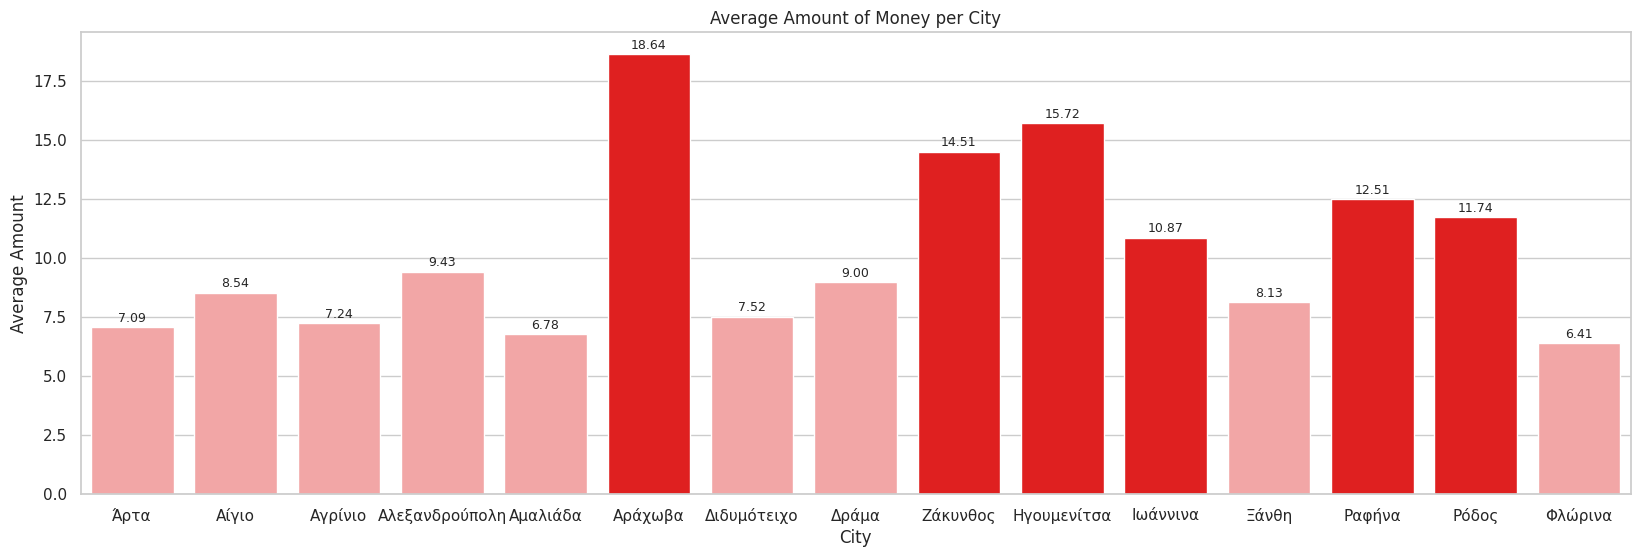

In [69]:
# Create a bar plot using Seaborn with slimmer columns and enhanced colors for values above 10 euros
plt.figure(figsize=(20, 6))  # Adjust the figure size

# Define a color palette with red for values above 10 euros and default color for others
colors = ['red' if value > 10 else '#FF9999' for value in average_amount_by_city['amount']]

plot = sns.barplot(
    x='city',
    y='amount',
    data=average_amount_by_city,
    palette=colors,
    capsize=0.1,
    errwidth=0.5,
    dodge=True
)

# Add annotations at the top of each bar
for index, value in enumerate(average_amount_by_city['amount']):
    plt.text(index, value + 0.1, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

# Customize the plot
plt.title('Average Amount of Money per City')
plt.xlabel('City')
plt.ylabel('Average Amount')

# Show the plot
plt.show()


In [70]:
# Calculate the total amount of money per cuisine
total_amount_by_cuisine = df.groupby('cuisine')['amount'].sum().reset_index()

# Display the result
total_amount_by_cuisine

,cuisine,amount
0,Breakfast,1672120.12
1,Italian,1363923.06
2,Local Stores,14510.16
3,Meat,2249032.19
4,Street food,1120158.90


In [71]:
# Calculate the total amount of money per cuisine and city
total_amount_by_cuisine_and_city = df.groupby(['city', 'cuisine'])['amount'].sum().reset_index()

# Display the result
total_amount_by_cuisine_and_city.head()

,city,cuisine,amount
0,Άρτα,Breakfast,46206.89
1,Άρτα,Italian,16035.20
2,Άρτα,Meat,46930.20
3,Αίγιο,Breakfast,41909.91
4,Αίγιο,Italian,48476.15


# **Device** **Analysis**

In [72]:
device_df = df.groupby('device').agg(order_count=('order_id','count'),
                                     total_income=('amount', 'sum'),
                                    ).reset_index()
device_df

,device,order_count,total_income
0,Android,315609,3068148.39
1,Desktop,39003,373591.97
2,MobWeb,51560,509796.88
3,iOS,250037,2468207.19


# Which cuisine is more common based on the people with the same device

In [73]:
fig = px.bar(device_df, x='device', y=['order_count', 'total_income'],
             labels={'total_income': 'Total Income'},
             color_discrete_sequence=['red', 'plum'],  # Set custom colors
             barmode='group')

# Set initial values for axis titles and graph title
x_axis_title = 'Operating System of Devices'
y_axis_title = 'Total Revenue'
graph_title = 'Opereting System per Total Income Generated'

# Customize the layout
fig.update_layout(
    width=800,  # Set the width of the graph
    height=500,  # Set the height of the graph
    xaxis_title=x_axis_title,  # Set the x-axis title
    yaxis_title=y_axis_title,  # Set the y-axis title
    title_y=0.9,  # Adjust the y position of the title
    title_x=0.5  # Adjust the x position of the title
)

# Show the plot
fig.show()

In [74]:
# Group by 'device' and 'cuisine' and count the number of orders for each combination
device_cuisine_counts = df.groupby(['device', 'cuisine']).size().reset_index(name='order_count')

# Group by 'cuisine' and sum the order counts for each cuisine
total_orders_by_cuisine = device_cuisine_counts.groupby('cuisine')['order_count'].sum().reset_index()

# Display the result
total_orders_by_cuisine

,cuisine,order_count
0,Breakfast,287474
1,Italian,90597
2,Local Stores,766
3,Meat,197875
4,Street food,79497


In [75]:
# Group by 'device', 'cuisine' and sum the order counts for each combination
total_orders_by_cuisine_and_device = df.groupby(['device', 'cuisine']).agg(order_count=('order_id', 'count')).reset_index()

# Display the result
total_orders_by_cuisine_and_device

,device,cuisine,order_count
0,Android,Breakfast,137117
1,Android,Italian,44301
2,Android,Local Stores,470
3,Android,Meat,99771
4,Android,Street food,33950
5,Desktop,Breakfast,15564
6,Desktop,Italian,5670
7,Desktop,Local Stores,41
8,Desktop,Meat,12746
9,Desktop,Street food,4982


In [76]:
# Assuming your DataFrame is named 'total_orders_by_cuisine_and_device'
fig = px.bar(total_orders_by_cuisine_and_device, x='device', y='order_count', color='cuisine',
             labels={'order_count': 'Order Count', 'device': 'Device'},
             title='Total Order Counts by Cuisine and Device',
             color_discrete_sequence=px.colors.qualitative.Set1,  # Set custom colors
             barmode='group')

# Customize the layout
fig.update_layout(
    width=800,  # Set the width of the graph
    height=500,  # Set the height of the graph
    xaxis_title='Device',  # Set the x-axis title
    yaxis_title='Order Count',  # Set the y-axis title
    title_y=0.9,  # Adjust the y position of the title
)

# Show the plot
fig.show()

# How customers choose to pay for their order based on their device


In [77]:
# Assuming your DataFrame is named 'payment_method_counts_pivot'
fig = px.bar(payment_method_counts_pivot, x='device', y=['cash', 'online'],
             title='Payment Method Distribution by Device',
             labels={'value': 'Number of Users', 'variable': 'Payment Method', 'device': 'Device'},
             color_discrete_map={'cash': '#FF0000', 'epayments': '#800080'},
             barmode='group')

# Update layout options
fig.update_layout(
    autosize=True,  # Set to False for fixed size
    width=800,      # Set the initial width
    height=500,     # Set the initial height
    title=dict(text='Payment Method Distribution by Device', x=0.5),
    xaxis=dict(title='Device'),
    yaxis=dict(title='Number of Users')
)

# Show the interactive plot
fig.show()

# Which OS generated the most income ?

In [78]:
# Group by 'device' and calculate total income and average amount per order for each device
device_stats = df.groupby('device').agg(
                                        total_income=('amount', 'sum'),
                                        average_amount_per_order=('amount', 'mean')
                                        ).reset_index().round(2)

device_stats

,device,total_income,average_amount_per_order
0,Android,3068148.39,9.72
1,Desktop,373591.97,9.58
2,MobWeb,509796.88,9.89
3,iOS,2468207.19,9.87


In [79]:
# Find the device that generates the most income
device_with_most_income = device_stats.loc[device_stats['total_income'].idxmax()]

# Display the results
print("Device with the most income:\n")
device_with_most_income

Device with the most income:



device                         Android
total_income                3068148.39
average_amount_per_order          9.72
Name: 0, dtype: object

In [80]:
# Create a pivot table to analyze device preferences based on user class
device_user_class_pivot = pd.pivot_table(df, values='order_id', index='device', columns='user_class_name', aggfunc='count', fill_value=0)

# Reset index to make 'device' and 'user_class_name' regular columns
device_user_class_pivot = device_user_class_pivot.reset_index()

# Melt the DataFrame for better use with plotly express
melted_df = pd.melt(device_user_class_pivot, id_vars='device', value_vars=device_user_class_pivot.columns[1:], var_name='User Class', value_name='Number of Orders')

# Define a custom color palette with various shades of red, purple, and violet
custom_palette = ['#FF0000', '#FF3366', '#FF6699', '#FF99CC', '#FFCCCC', '#CC99FF', '#9966CC']

# Set initial values for axis titles and graph title
x_axis_title = 'Operating System of Devices'
y_axis_title = 'Total Number of Orders'
graph_title = 'User Class Preferences Across Devices'

# Create an interactive bar chart using plotly express with the custom color palette
fig = px.bar(melted_df, x='device', y='Number of Orders', color='User Class',
             color_discrete_sequence=custom_palette,
             labels={'Number of Orders': y_axis_title, 'device': x_axis_title},
             title=graph_title,
             barmode='group')

# Customize the layout
fig.update_layout(
    width=800,  # Set the width of the graph
    height=500,  # Set the height of the graph
    xaxis_title=x_axis_title,  # Set the x-axis title
    yaxis_title=y_axis_title,  # Set the y-axis title
    title_y=0.9,  # Adjust the y position of the title
    title_x=0.5  # Adjust the x position of the title
)

# Show the plot
fig.show()

# Which operetional users choose to buy with coupon more often ?

In [81]:
# Assuming your DataFrame is named 'df'
# Group by 'device' and 'order_contains_offer', and calculate the count of orders for each combination
coupon_usage_by_device = df.groupby(['device', 'order_contains_offer']).size().reset_index(name='order_count')

# Pivot the DataFrame to get 'with_coupon' and 'without_coupon' columns
coupon_usage_by_device_pivot = coupon_usage_by_device.pivot(index='device', columns='order_contains_offer', values='order_count').reset_index()

# Rename the columns for clarity
coupon_usage_by_device_pivot.columns = ['device', 'without_coupon', 'with_coupon']

# Display the result
coupon_usage_by_device_pivot

,device,without_coupon,with_coupon
0,Android,276031,39578
1,Desktop,34500,4503
2,MobWeb,45580,5980
3,iOS,224571,25466


In [82]:
fig = px.bar(coupon_usage_by_device_pivot, x='device', y=['without_coupon', 'with_coupon'],
             title='How many users choose to buy with coupons by Device',
             labels={'value': 'Number of Users', 'device': 'Device', 'variable': 'Coupon Usage'},
             color_discrete_map={'without_coupon': 'red', 'with_coupon': 'purple'},
             barmode='group')

# Update layout options
fig.update_layout(
    autosize=False,
    width=800,      # Set the initial width
    height=500,     # Set the initial height
    title=dict(text='Coupon Usage Distribution by Device', x=0.5),
    xaxis=dict(title='Device'),
    yaxis=dict(title='Number of Users')
)

# Show the interactive plot
fig.show()

# User Profile Analysis

In [83]:
# Extract the user profile category
user_classes = df['user_class_name'].unique()
print(f"Each user can be one of the following based on their loyalty: {', '.join(user_classes)}")

Each user can be one of the following based on their loyalty: All Star, Common User, High Spenders, Infrequent, One Timers, Loyal


In [84]:
# Find the category with the highest spending
most_spending_category = total_spending_by_category.loc[total_spending_by_category['amount'].idxmax()]
print(f"Total amount spent in deliveries is: {most_spending_category['amount']}")

Total amount spent in deliveries is: 2046029.5


In [85]:
# Find the category with the highest spending
most_spending_category = total_spending_by_category.loc[total_spending_by_category['amount'].idxmax()]

# Display the result
print(f"The user class '{most_spending_category['user_class_name']}' spends the most money in total.")

The user class 'All Star' spends the most money in total.


# Which cuisine is most wanted per user category ?

In [86]:
# Group by 'user_class_name' and 'cuisine', sum the 'amount' for each category and cuisine
total_spending_by_cuisine_and_category = df.groupby(['user_class_name', 'cuisine'])['amount'].sum().reset_index()

# Find the cuisine with the highest spending for each category
most_spending_cuisine_by_category = total_spending_by_cuisine_and_category.loc[
    total_spending_by_cuisine_and_category.groupby('user_class_name')['amount'].idxmax()
]

# Display the result
print("Cuisine with the highest spending for each user category: \n \n")
most_spending_cuisine_by_category

Cuisine with the highest spending for each user category: 
 



,user_class_name,cuisine,amount
0,All Star,Breakfast,719887.81
8,Common User,Meat,528092.09
13,High Spenders,Meat,407809.96
18,Infrequent,Meat,288457.60
20,Loyal,Breakfast,348249.83
28,One Timers,Meat,157939.39


In [87]:
fig = px.bar(most_spending_cuisine_by_category, x='user_class_name', y='amount',
             color='cuisine', barmode='group',
             title='Most Spending Cuisine by User Category',
             labels={'amount': 'Total Amount Spent', 'user_class_name': 'User Class'},
             color_discrete_map={'Breakfast': 'red', 'Meat': 'purple'})

# Update layout options
fig.update_layout(
    autosize=True,  # Set to False for fixed size
    width=800,      # Set the initial width
    height=500,     # Set the initial height
    title=dict(text='Most Spending Cuisine by User Category', x=0.5),
    xaxis=dict(title='User Class'),
    yaxis=dict(title='Total Amount Spent')
)

# Show the interactive plot
fig.show()

# What period of time each user category tend to order food ?

# how many of users per category have each city

In [88]:
user_count_by_city_class = df.groupby(['city', 'user_class_name'])['user_id'].nunique().reset_index(name='user_count')

# Pivot the DataFrame to have user class as columns
user_count_pivot = user_count_by_city_class.pivot(index='city', columns='user_class_name', values='user_count').reset_index()

# Display the result
user_count_pivot

user_class_name,city,All Star,Common User,High Spenders,Infrequent,Loyal,One Timers
0,Άρτα,306.0,762.0,152.0,785.0,650.0,651.0
1,Αίγιο,366.0,855.0,321.0,860.0,536.0,788.0
2,Αγρίνιο,1382.0,2975.0,671.0,3027.0,2315.0,2393.0
3,Αλεξανδρούπολη,992.0,3014.0,916.0,3671.0,1480.0,3445.0
4,Αμαλιάδα,40.0,76.0,19.0,67.0,45.0,63.0
5,Αράχωβα,1.0,2.0,NaN,7.0,1.0,6.0
6,Διδυμότειχο,122.0,324.0,55.0,438.0,264.0,428.0
7,Δράμα,743.0,2076.0,631.0,2483.0,1078.0,2297.0
8,Ζάκυνθος,258.0,670.0,565.0,891.0,178.0,1319.0
9,Ηγουμενίτσα,14.0,72.0,37.0,107.0,17.0,174.0


In [89]:
fig = px.bar(user_count_pivot, x='city', y=user_count_pivot.columns[1:],
             title='User Count by User Class in Each City',
             labels={'value': 'Number of Users', 'city': 'City'},
             color_discrete_map={'All Star': '#FF0000', 'Common User': '#800080', 'High Spenders': '#FF9900', 'Infrequent': '#FFD700', 'Loyal': '#FF6347'},
             barmode='stack') #group

# Update layout options
fig.update_layout(
    autosize=True,  # Set to False for fixed size
    width=1500,      # Set the initial width
    height=500,     # Set the initial height
    title=dict(text='User Count by User Class in Each City', x=0.5),
    xaxis=dict(title='City'),
    yaxis=dict(title='Number of Users')
)

# Show the interactive plot
fig.show()

# Which category buy without coupons oftenly ?


In [90]:
without_coupons = df[df['order_contains_offer'] == 0]

user_category_spending = without_coupons.groupby('user_class_name')['amount'].sum().reset_index()
user_category_spending = user_category_spending.sort_values(by='amount', ascending=False)

user_category_spending

,user_class_name,amount
0,All Star,1843489.15
1,Common User,1166339.00
2,High Spenders,975778.87
4,Loyal,657389.30
3,Infrequent,633905.03
5,One Timers,375590.23


# which is the most preffered option to pay by user category

In [91]:
payment_preference_by_category = df.groupby(['user_class_name', 'payment_method'])['order_id'].count().reset_index()
payment_preference_by_category

,user_class_name,payment_method,order_id
0,All Star,0,117039
1,All Star,1,114460
2,Common User,0,57356
3,Common User,1,67523
4,High Spenders,0,33964
5,High Spenders,1,35616
6,Infrequent,0,27949
7,Infrequent,1,38694
8,Loyal,0,59319
9,Loyal,1,71648


In [92]:
# Create a DataFrame with counts of orders for each user category and payment method
payment_preference_by_category = df.groupby(['user_class_name', 'payment_method']).size().reset_index(name='order_count')

# Pivot the DataFrame to get counts for each payment method and a total count
payment_preference_by_category = payment_preference_by_category.pivot(index='user_class_name', columns='payment_method', values='order_count').fillna(0)

# Add a new column 'Total' representing the total number of orders for each category
payment_preference_by_category['Total'] = payment_preference_by_category.sum(axis=1)

# Calculate the percentage of orders paid with cash and epayments for each category
payment_preference_by_category['Cash_Percentage'] = ((payment_preference_by_category['0'] / payment_preference_by_category['Total']) * 100).round(2)
payment_preference_by_category['Online_Percentage'] = ((payment_preference_by_category['1'] / payment_preference_by_category['Total']) * 100).round(2)

# Display the result
payment_preference_by_category[['Cash_Percentage', 'Online_Percentage']] = payment_preference_by_category[['Cash_Percentage', 'Online_Percentage']].astype(int)

# Rename the columns to include the symbol '%' in the column names
payment_preference_by_category.rename(columns={'Cash_Percentage': 'Cash_Percentage', 'Online_Percentage': 'Online_Percentage'}, inplace=True)

# Display the result
payment_preference_by_category

payment_method,0,1,Total,Cash_Percentage,Online_Percentage
user_class_name,,,,,
All Star,117039,114460,231499,50,49
Common User,57356,67523,124879,45,54
High Spenders,33964,35616,69580,48,51
Infrequent,27949,38694,66643,41,58
Loyal,59319,71648,130967,45,54
One Timers,13198,19443,32641,40,59


In [93]:
df.head()

,order_id,user_id,user_class_name,city,vertical,cuisine,device,order_contains_offer,coupon_discount_amount,amount,delivery_cost,payment_method,year,month,day_of_week,hour,time_of_day,month_name,delivery_source,hours_since_last_order
363118,11395116768556,92766177,All Star,Ραφήνα,Restaurant,Italian,Android,1,0.0,14.0,0.0,0,2023,8,Thursday,0,evening,August,Store,NaN
363119,11575933528344,92766177,Common User,Ραφήνα,Restaurant,Italian,Android,1,0.0,14.0,0.0,0,2023,9,Monday,0,evening,September,Store,0.0
275713,11280223452472,110361993,Common User,Ρόδος,Restaurant,Street food,iOS,0,0.0,21.8,0.0,0,2023,8,Saturday,0,evening,August,Store,NaN
275714,11323128712488,110361993,Common User,Ρόδος,Restaurant,Street food,iOS,0,0.0,25.9,0.0,0,2023,8,Saturday,0,lunch_time,August,Store,0.0
275715,11344951114972,110361993,Common User,Ρόδος,Restaurant,Meat,iOS,0,0.0,17.2,1.0,0,2023,8,Wednesday,0,evening,August,Efood,0.0


In [94]:
# Create a DataFrame with counts of orders for each user category and payment method
payment_preference_by_category = df.groupby(['user_class_name', 'payment_method'])['order_id'].count().reset_index()

# Pivot the DataFrame to get counts for each payment method and a total count
payment_preference_by_category = payment_preference_by_category.pivot(index='user_class_name', columns='payment_method', values='order_id').fillna(0)

# Add a new column 'Total' representing the total number of orders for each category
payment_preference_by_category['Total'] = payment_preference_by_category.sum(axis=1)

# Calculate the percentage of orders paid with cash and online for each category
payment_preference_by_category['Cash_Percentage'] = ((payment_preference_by_category['0'] / payment_preference_by_category['Total']) * 100).round(2)
payment_preference_by_category['Online_Percentage'] = ((payment_preference_by_category['1'] / payment_preference_by_category['Total']) * 100).round(2)

# Display the result without the symbol '%'
payment_preference_by_category[['Cash_Percentage', 'Online_Percentage']] = payment_preference_by_category[['Cash_Percentage', 'Online_Percentage']].astype(float)

# Rename the columns to include the symbol '%' in the column names
payment_preference_by_category.rename(columns={'Cash_Percentage': 'Cash_Percentage', 'Online_Percentage': 'Online_Percentage'}, inplace=True)

# Display the result
payment_preference_by_category

payment_method,0,1,Total,Cash_Percentage,Online_Percentage
user_class_name,,,,,
All Star,117039,114460,231499,50.56,49.44
Common User,57356,67523,124879,45.93,54.07
High Spenders,33964,35616,69580,48.81,51.19
Infrequent,27949,38694,66643,41.94,58.06
Loyal,59319,71648,130967,45.29,54.71
One Timers,13198,19443,32641,40.43,59.57


In [95]:
# Melt the DataFrame to long format for easier plotting
melted_payment_preference_by_category = pd.melt(payment_preference_by_category.reset_index(),
                                                id_vars='user_class_name',
                                                value_vars=['Cash_Percentage', 'Online_Percentage'],
                                                var_name='Payment Method',
                                                value_name='Percentage')

# Plot using Plotly Express
fig = px.bar(melted_payment_preference_by_category,
             x='user_class_name',
             y='Percentage',
             color='Payment Method',
             title='Percentage of Orders Paid with Cash and Epayment by User Category',
             labels={'Percentage': 'Percentage of Orders', 'user_class_name': 'User Category'},
             color_discrete_map={'Cash_Percentage': 'red', 'Online_Percentage': 'Purple'},
             barmode='group')

# Update layout options
fig.update_layout(
    autosize=True,
    width=1000,
    height=500,
    title=dict(text='Payment Method Distribution by User Category', x=0.5),
    xaxis=dict(title='User Category'),
    yaxis=dict(title='Percentage of Orders'),
    margin=dict(l=50, r=50, b=50, t=50)
)

# Show the interactive plot
fig.show()

# **Date and Time Analysis**

In [96]:
# Assuming your DataFrame is named df
total_orders = df['order_id'].count()

# Group by 'time_of_day' and calculate the count and mean amount of orders in each category
orders_by_time_of_day = df.groupby('time_of_day').agg(order_count=('order_id', 'count'),
                                                      total_order_amount=('amount', 'sum')).reset_index()

# Calculate the mean order amount for each time of day
orders_by_time_of_day['average_order_amount'] = orders_by_time_of_day['total_order_amount'] / orders_by_time_of_day['order_count']

# Convert 'average_order_amount' to two decimal places for better display
orders_by_time_of_day['average_order_amount'] = orders_by_time_of_day['average_order_amount'].round(2)

# Display the results
print('Orders by Time of Day: \n')
orders_by_time_of_day

Orders by Time of Day: 



,time_of_day,order_count,total_order_amount,average_order_amount
0,morning,177250,1172007.91,6.61
1,lunch_time,195557,1872393.24,9.57
2,evening,283402,3375343.28,11.91


In [97]:
# Plot using Plotly Express
fig = px.bar(orders_by_time_of_day,
             x='time_of_day',
             y=['order_count', 'average_order_amount'],
             title='Orders Count and Average Order Amount by Time of Day',
             labels={'value': 'Count/Amount', 'time_of_day': 'Time of Day'},
             color_discrete_map={'order_count': 'red', 'average_order_amount': 'purple'},
             barmode='group')

# Update layout options
fig.update_layout(
    autosize=True,
    width=800,
    height=500,
    title=dict(text='Orders Count and Average Order Amount by Time of Day', x=0.5),
    xaxis=dict(title='Time of Day'),
    yaxis=dict(title='Count/Amount'),
    margin=dict(l=50, r=50, b=50, t=50)
)

# Show the interactive plot
fig.show()

In [98]:
# Group by 'month' and 'time_of_day' and calculate the total amount of orders
total_orders_by_month_and_time = df.groupby(['month', 'time_of_day'])['amount'].sum().reset_index()
# Create a dictionary to map month numbers to their names
month_names = {8: 'August', 9: 'September'}

# Replace the month numbers with names in the DataFrame
total_orders_by_month_and_time['month'] = total_orders_by_month_and_time['month'].map(month_names)

# Plot using Plotly Express
fig = px.bar(total_orders_by_month_and_time,
             x='month',
             y='amount',
             color='time_of_day',
             title='Total Amount of Orders by Month and Time of Day',
             labels={'amount': 'Total Amount of Orders', 'month': 'Month'},
             color_discrete_map={'morning': 'purple', 'lunch_time': 'lightblue', 'evening': 'red'},
                          barmode='group')

# Update layout options
fig.update_layout(
    autosize=True,
    width=800,
    height=500,
    title=dict(text='Total Amount of Orders by Month and Time of Day', x=0.5),
    xaxis=dict(title='Month'),
    yaxis=dict(title='Total Amount of Orders'),
    margin=dict(l=50, r=50, b=50, t=50)
)

# Show the interactive plot
fig.show()

# Which city makes the mose orders each time of the day

In [99]:
# Group by 'city', 'time_of_day', and calculate the count of orders, the total amount, and the total coupon discount amount
orders_by_city_and_time = df.groupby(['city', 'time_of_day'])['order_id', 'amount', 'coupon_discount_amount'].agg({
    'order_id': 'count',
    'amount': 'sum',
    'coupon_discount_amount': 'sum'
}).reset_index()

# Calculate the net amount (amount - coupon_discount_amount) for each order
orders_by_city_and_time['net_amount'] = orders_by_city_and_time['amount'] - orders_by_city_and_time['coupon_discount_amount']

# Find the city with the most orders for each period of the day
most_orders_by_time = orders_by_city_and_time.loc[orders_by_city_and_time.groupby('time_of_day')['order_id'].idxmax()].reset_index(drop=True)

# Rename the 'order_id' column to 'order_count'
most_orders_by_time.rename(columns={'order_id': 'order_count'}, inplace=True)

# Display the result
most_orders_by_time

<ipython-input-99-93bc0d8efaac>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,city,time_of_day,order_count,amount,coupon_discount_amount,net_amount
0,Ρόδος,morning,47283,399476.89,4256.92,395219.97
1,Ρόδος,lunch_time,49195,558187.64,5402.94,552784.70
2,Ρόδος,evening,63993,926713.01,8893.56,917819.45


In [100]:
# Plot using Plotly Express
fig = px.bar(most_orders_by_time,
             x='city',
             y='net_amount',
             color='time_of_day',
             title='Most Orders by City and Time of Day',
             labels={'net_amount': 'Total Net Amount of Orders', 'city': 'City'},
             color_discrete_map={'morning': 'purple', 'lunch_time': 'lightblue', 'evening': 'red'},
             barmode='group')

# Update layout options
fig.update_layout(
    autosize=True,
    width=800,
    height=500,
    title=dict(text='Most Orders by City and Time of Day', x=0.5),
    xaxis=dict(title='City'),
    yaxis=dict(title='Total Net Amount of Orders'),
    margin=dict(l=50, r=50, b=50, t=50)
)

# Show the interactive plot
fig.show()

# Which cuisine is most popular based on the time of day and the count of orders

In [101]:
# Group by 'cuisine', 'time_of_day', and calculate the count, total amount, and net amount of orders
orders_by_cuisine_and_time = df.groupby(['cuisine', 'time_of_day']).agg(
    order_count=('order_id', 'count'),
    total_amount=('amount', 'sum'),
    total_coupon_discount=('coupon_discount_amount', 'sum')
).reset_index()

# Calculate the net amount by subtracting the coupon discount
orders_by_cuisine_and_time['net_amount'] = orders_by_cuisine_and_time['total_amount'] - orders_by_cuisine_and_time['total_coupon_discount']

# Find the cuisine with the most orders for each period of the day
most_popular_cuisine_by_time = orders_by_cuisine_and_time.loc[orders_by_cuisine_and_time.groupby('time_of_day')['order_count'].idxmax()].reset_index(drop=True)

# Display the result
most_popular_cuisine_by_time

,cuisine,time_of_day,order_count,total_amount,total_coupon_discount,net_amount
0,Breakfast,morning,151592,883967.56,9754.28,874213.28
1,Breakfast,lunch_time,84973,496564.89,5073.36,491491.53
2,Meat,evening,118550,1359646.25,8609.10,1351037.15


In [102]:
# Plot order count using Plotly Express
fig_count = px.bar(most_popular_cuisine_by_time,
                   x='time_of_day',
                   y='order_count',
                   color='cuisine',
                   labels={'order_count': 'Order Count', 'time_of_day': 'Time of Day'},
                   barmode='group')

# Update layout options for order count plot
fig_count.update_layout(
    autosize=True,
    width=800,
    height=500,
    title=dict(text='Most Orders by City and Time of Day', x=0.5),
    xaxis=dict(title='Time of Day'),
    yaxis=dict(title='Order Count'),
    margin=dict(l=50, r=50, b=50, t=50)
)

# Show the interactive plots
fig_count.show()

In [103]:
# Plot net amount using Plotly Express
fig_amount = px.bar(most_popular_cuisine_by_time,
                    x='time_of_day',
                    y='net_amount',
                    color='cuisine',
                    title='Most Popular Cuisine by Time of Day (Net Amount)',
                    labels={'net_amount': 'Net Amount', 'time_of_day': 'Time of Day'},
                    barmode='group')

# Update layout options for net amount plot
fig_amount.update_layout(
    autosize=True,
    width=800,
    height=500,
    xaxis=dict(title='Time of Day'),
    yaxis=dict(title='Net Amount'),
    margin=dict(l=50, r=50, b=50, t=50)
)
fig_amount.show()

# Which time of day the users use their coupons

# Coupon Usage by Time of Day:

In [104]:
# Filter rows where coupons are used
coupon_df = df[df['coupon_discount_amount'] > 0]

# Group by 'time_of_day' and calculate the count of coupon usage
coupon_usage_by_time = coupon_df.groupby('time_of_day')['order_id'].count().reset_index()

# Plot coupon usage by time of day
fig_coupon_usage = px.bar(coupon_usage_by_time,
                          x='time_of_day',
                          y='order_id',
                          title='Coupon Usage by Time of Day',
                          labels={'order_id': 'Coupon Usage Count', 'time_of_day': 'Time of Day'},
                          barmode='group')

# Update layout options for coupon usage plot
fig_coupon_usage.update_layout(
    autosize=True,
    width=800,
    height=500,
    xaxis=dict(title='Time of Day'),
    yaxis=dict(title='Coupon Usage Count'),
    margin=dict(l=50, r=50, b=50, t=50)
)

# Show the interactive plot
fig_coupon_usage.show()

# Most Popular Cuisine with Coupons by Time of Day

In [105]:
# Group by 'time_of_day' and 'cuisine' and calculate the count of orders
most_popular_cuisine_by_time = coupon_df.groupby(['time_of_day', 'cuisine'])['order_id'].count().reset_index()
most_popular_cuisine_by_time = most_popular_cuisine_by_time.loc[most_popular_cuisine_by_time.groupby('time_of_day')['order_id'].idxmax()].reset_index(drop=True)

# Plot most popular cuisine with coupons by time of day
fig_most_popular_cuisine = px.bar(most_popular_cuisine_by_time,
                                  x='time_of_day',
                                  y='order_id',
                                  color='cuisine',
                                  title='Most Popular Cuisine with Coupons by Time of Day',
                                  labels={'order_id': 'Order Count', 'time_of_day': 'Time of Day'},
                                  barmode='group')

# Update layout options for most popular cuisine plot
fig_most_popular_cuisine.update_layout(
    autosize=True,
    width=800,
    height=500,
    xaxis=dict(title='Time of Day'),
    yaxis=dict(title='Order Count'),
    margin=dict(l=50, r=50, b=50, t=50)
)

# Show the interactive plot
fig_most_popular_cuisine.show()

# Which period of time each user category order most of the time in percentage

In [106]:
# Group by 'user_class_name', 'time_of_day', and calculate the count of orders
orders_by_user_category_and_time = df.groupby(['user_class_name', 'time_of_day'])['order_id'].count().reset_index()

# Calculate the total count of orders for each user category
total_orders_by_user_category = df.groupby('user_class_name')['order_id'].count().reset_index()

# Merge the two DataFrames to calculate the percentage of orders
merged_df = pd.merge(orders_by_user_category_and_time, total_orders_by_user_category, on='user_class_name', suffixes=('_period', '_total'))

# Calculate the percentage of orders for each user category and time period
merged_df['percentage'] = (merged_df['order_id_period'] / merged_df['order_id_total']) * 100

# Plot using Plotly Express
fig = px.bar(merged_df,
             x='user_class_name',
             y='percentage',
             color='time_of_day',
             title='Percentage of Orders by User Category and Time of Day',
             labels={'percentage': 'Percentage of Orders', 'user_class_name': 'User Category', 'time_of_day': 'Time of Day'},
             color_discrete_map={'morning': 'purple', 'lunchtime': 'lightblue', 'evening': 'red'},
             barmode='group')

# Update layout options
fig.update_layout(
    autosize=True,
    width=800,
    height=500,
    title=dict(text='Percentage of Orders by User Category and Time of Day', x=0.5),
    xaxis=dict(title='User Category'),
    yaxis=dict(title='Percentage of Orders'),
    margin=dict(l=50, r=50, b=50, t=50)
)

# Show the interactive plot
fig.show()

# **Cities Analysis**

In [107]:
# Get unique city names
unique_cities = df['city'].unique()

# Display the unique city names
print("Unique Cities:",unique_cities)

Unique Cities: ['Ραφήνα' 'Ρόδος' 'Άρτα' 'Αίγιο' 'Ιωάννινα' 'Ζάκυνθος' 'Αγρίνιο' 'Δράμα'
 'Αμαλιάδα' 'Ξάνθη' 'Αλεξανδρούπολη' 'Φλώρινα' 'Ηγουμενίτσα' 'Αράχωβα'
 'Διδυμότειχο']


In [108]:
# Get unique city names
unique_cities = df['city'].unique()

# Initialize a geolocator
geolocator = Nominatim(user_agent="efood")


# Function to get coordinates for a city
def get_coordinates_for_city(city):
    location = geolocator.geocode(city)
    if location:
        return pd.Series({'city': city, 'latitude': location.latitude, 'longitude': location.longitude})
    else:
        return pd.Series({'city': city, 'latitude': None, 'longitude': None})

# Create a DataFrame with unique city names and their coordinates
coordinates_df = pd.DataFrame(unique_cities, columns=['city'])
coordinates_df[['latitude', 'longitude']] = coordinates_df['city'].apply(get_coordinates_for_city)[['latitude', 'longitude']]

# Display the DataFrame with unique city names and their coordinates
coordinates_df

,city,latitude,longitude
0,Ραφήνα,38.020370,24.007337
1,Ρόδος,36.172530,27.919402
2,Άρτα,39.161321,20.986264
3,Αίγιο,38.250570,22.085291
4,Ιωάννινα,39.663982,20.852278
5,Ζάκυνθος,37.789138,20.790090
6,Αγρίνιο,38.624828,21.409421
7,Δράμα,41.149944,24.146829
8,Αμαλιάδα,37.797131,21.351450
9,Ξάνθη,41.138029,24.886269


In [109]:
# Group by 'city' and calculate the count of orders and the total amount for each city
city_stats = df.groupby('city').agg(order_count=('order_id', 'count'), total_amount_orders=('amount', 'sum')).reset_index()
city_stats

,city,order_count,total_amount_orders
0,Άρτα,15399,109172.29
1,Αίγιο,18449,157625.56
2,Αγρίνιο,82262,595521.88
3,Αλεξανδρούπολη,59162,557691.41
4,Αμαλιάδα,911,6173.35
5,Αράχωβα,18,335.50
6,Διδυμότειχο,8378,62995.57
7,Δράμα,50678,456115.01
8,Ζάκυνθος,13502,195961.19
9,Ηγουμενίτσα,1011,15894.50


In [110]:
cities_df = pd.merge(coordinates_df[['city','latitude',	'longitude']], city_stats, on='city', how='outer')

# Display the final DataFrame
cities_df

,city,latitude,longitude,order_count,total_amount_orders
0,Ραφήνα,38.020370,24.007337,13576,169887.64
1,Ρόδος,36.172530,27.919402,160471,1884377.54
2,Άρτα,39.161321,20.986264,15399,109172.29
3,Αίγιο,38.250570,22.085291,18449,157625.56
4,Ιωάννινα,39.663982,20.852278,120035,1304928.13
5,Ζάκυνθος,37.789138,20.790090,13502,195961.19
6,Αγρίνιο,38.624828,21.409421,82262,595521.88
7,Δράμα,41.149944,24.146829,50678,456115.01
8,Αμαλιάδα,37.797131,21.351450,911,6173.35
9,Ξάνθη,41.138029,24.886269,106317,864371.39


# **Interactive map of Greece displaying information for each city**

In [111]:
# Extract necessary columns
locations = cities_df

# Create a folium map centered around Greece
greece_map = folium.Map(location=[38.5, 23], zoom_start=6)

# Create a MarkerCluster for better visualization of markers
marker_cluster = MarkerCluster().add_to(greece_map)

# Iterate over rows and add markers to the map
for index, location_info in locations.iterrows():
    folium.Marker(
        location=[location_info['latitude'], location_info['longitude']],
        popup=f"City: {location_info['city']}<br>Orders Count: {location_info['order_count']}<br>Total Revenue: {location_info['total_amount_orders']}",
        icon=folium.Icon(color='red')
    ).add_to(marker_cluster)

# Display the map
greece_map

In [112]:
import folium
from folium.plugins import HeatMap

# Assuming you have a DataFrame called cities_df with columns: latitude, longitude, total_amount_orders
#locations = cities_df[['latitude', 'longitude', 'total_amount_orders']]

# Create a folium map centered around Greece
greece_map1 = folium.Map(location=[38.5, 23], zoom_start=6)

# Ensure that the 'total_amount_orders' column is numeric
cities_df['total_amount_orders'] = pd.to_numeric(cities_df['total_amount_orders'], errors='coerce')

# Create a heatmap layer using HeatMap
heat_data = [[row['latitude'], row['longitude'], row['total_amount_orders']] for index, row in cities_df.iterrows()]
HeatMap(heat_data).add_to(greece_map1)

# Display the map
greece_map1


# **Which users would you recommend to target in an upcoming coupon campaign dedicated to Breakfast cuisine?**

In [113]:
# Extract necessary columns
user_order_counts = df.groupby(['user_class_name', 'user_id'])['amount'].count().reset_index()
user_order_counts.columns = ['user_class_name', 'user_id', 'order_count']

# Calculate the average order count per user within each class
average_order_count_per_user = user_order_counts.groupby('user_class_name')['order_count'].mean().reset_index()
average_order_count_per_user.columns = ['user_class_name', 'average_order_count']

# Display the result
average_order_count_per_user

,user_class_name,average_order_count
0,All Star,19.946493
1,Common User,4.309144
2,High Spenders,5.716868
3,Infrequent,2.080318
4,Loyal,9.518642
5,One Timers,1.079827


In [114]:
# Extract necessary columns
user_order_counts = df.groupby(['user_class_name', 'user_id'])['amount'].count().reset_index()
user_order_counts.columns = ['user_class_name', 'user_id', 'order_count']

In [115]:
# Exclude "One Timers" and "All Star" classes
user_order_counts_filtered = user_order_counts[~user_order_counts['user_class_name'].isin(['One Timers', 'All Star'])]
user_order_counts_filtered

,user_class_name,user_id,order_count
11606,Common User,92766177,1
11607,Common User,110361993,7
11608,Common User,138437670,4
11609,Common User,168065919,13
11610,Common User,201704979,3
...,...,...,...
98546,Loyal,868315093443,7
98547,Loyal,868800401574,7
98548,Loyal,869312879715,6
98549,Loyal,870376003392,1


In [116]:
user_order_counts_filtered.user_class_name.unique()

array(['Common User', 'High Spenders', 'Infrequent', 'Loyal'],
      dtype=object)

In [117]:
# Calculate the average order count per user within each class
average_order_count_per_user = user_order_counts_filtered.groupby('user_class_name')['order_count'].mean().reset_index()
average_order_count_per_user.columns = ['user_class_name', 'average_order_count']

# Display the result
average_order_count_per_user

,user_class_name,average_order_count
0,Common User,4.309144
1,High Spenders,5.716868
2,Infrequent,2.080318
3,Loyal,9.518642


In [118]:
# Extract necessary columns
user_order_counts_filtered = user_order_counts_filtered[['user_class_name', 'user_id', 'order_count']].copy()

# Calculate the average order count per user within each class
average_order_count_per_user = user_order_counts_filtered.groupby('user_class_name')['order_count'].mean().reset_index()
average_order_count_per_user.columns = ['user_class_name', 'average_order_count']

# Merge with the original user_order_counts_filtered DataFrame
merged_df_filtered = pd.merge(user_order_counts_filtered, average_order_count_per_user, on='user_class_name')

# Filter rows where order_count is greater than average_order_count
unique_users_greater_than_average = merged_df_filtered[merged_df_filtered['order_count'] > merged_df_filtered['average_order_count']]

# Display the result
unique_users_greater_than_average

,user_class_name,user_id,order_count,average_order_count
1,Common User,110361993,7,4.309144
3,Common User,168065919,13,4.309144
12,Common User,604338651,6,4.309144
13,Common User,770593236,8,4.309144
17,Common User,1117981221,5,4.309144
...,...,...,...,...
86929,Loyal,866634046110,14,9.518642
86930,Loyal,866678682555,15,9.518642
86933,Loyal,867122588766,10,9.518642
86934,Loyal,867163085019,11,9.518642


In [119]:
unique_users_greater_than_average.user_class_name.unique()

array(['Common User', 'High Spenders', 'Infrequent', 'Loyal'],
      dtype=object)

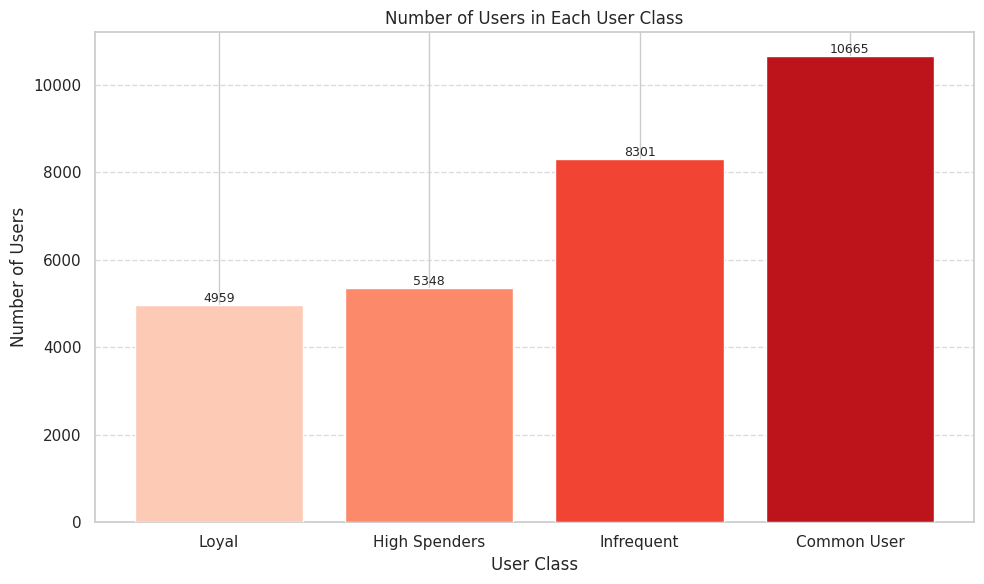

In [120]:
# Count the number of unique users in each class
class_user_counts = unique_users_greater_than_average['user_class_name'].value_counts().sort_index()

# Sort the values in descending order
class_user_counts = class_user_counts.sort_values(ascending=True)

# Plot a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(class_user_counts.index, class_user_counts, color=sns.color_palette('Reds', len(class_user_counts)), zorder=3,edgecolor=None)

# Add data labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(int(bar.get_height())), ha='center', va='bottom', fontsize=9)

# Add labels and title
plt.xlabel('User Class')
plt.ylabel('Number of Users')
plt.title('Number of Users in Each User Class')

# Customize the plot
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
plt.tight_layout()

# Show the plot
plt.show()